# 任务1: Pandas 基础入门


## 学习目标

了解 Pandas 的基本概念和核心数据结构。



## 1. 安装和导入 Pandas

**原理讲解：**
Pandas 是 Python 数据分析的核心库，提供了高性能、易于使用的数据结构和数据分析工具。在开始使用 Pandas 之前，需要先安装该库并将其导入到 Python 环境中。安装过程使用 pip（Python 包安装程序）从 Python 包索引（PyPI）下载并安装库文件。

**pip install 命令详解：**

- `pip`: Python 的包安装程序，用于安装和管理 Python 包
- `install`: pip 的子命令，表示要安装包
- `pandas`: 要安装的包名，Pandas 库的官方名称
- `openpyxl`: 用于处理 Excel 文件的依赖库，Pandas 操作 Excel 文件时需要

**参数说明：**

- `!`: 在 Jupyter Notebook 中表示执行系统命令，将命令传递给终端执行
- 包名后面可以跟版本号，如 `pandas==1.5.3`，用于安装特定版本
- 可以使用 `-U` 参数升级已安装的包：`pip install -U pandas`
- 可以使用 `-i` 参数指定镜像源：`pip install pandas -i https://pypi.tuna.tsinghua.edu.cn/simple/`

In [1]:
# 任务1完成步骤:
# 1. 安装 pandas 库:pip install pandas
# 2. 导入 pandas 库:import pandas as pd
! pip install pandas
! pip install openpyxl

## 2. 核心数据结构

Pandas 有两个核心数据结构：Series 和 DataFrame。

**Series** 是一维标记数组，可以存储任意数据类型（整数、字符串、浮点数、Python 对象等）。Series 的轴标签统称为索引。

**原理讲解：**
Series 是 Pandas 的基础数据结构，类似于带有标签的一维数组。它由两个主要部分组成：

1. **数据值**：存储实际的数据，可以是任意数据类型
2. **索引**：每个数据值对应的标签，用于标识和访问数据

**Series 的核心特性：**

- **一维性**：只有一个维度的数据结构
- **同质性**：所有数据值必须是相同的数据类型
- **标签索引**：每个值都有一个对应的索引标签
- **大小不变性**：创建后大小不能直接改变（需要重新创建）

**pd.Series() 构造函数详解：**

**参数说明：**

```python
pd.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)
```

- `data`: 包含 Series 数据的对象，可以是列表、数组、字典、标量值等
- `index`: 索引标签列表，必须与数据长度相同
- `dtype`: 指定数据类型，如 'int64', 'float32', 'object' 等
- `name`: Series 的名称，用于标识该 Series
- `copy`: 是否复制数据，默认为 False
- `fastpath`: 内部优化参数，一般不需要设置

**创建 Series 的方法：**

**1. 从列表创建：**

**原理讲解：**
从列表创建 Series 是最简单直接的方式。Pandas 会自动为数据创建默认的整数索引（从 0 开始）。

**参数详解：**

- `data`: 传入的列表数据
- 如果不指定 `index` 参数，会自动创建 0, 1, 2, ... 的默认索引
- `dtype` 会根据数据自动推断，也可以手动指定

**2. 使用自定义索引：**

**原理讲解：**
自定义索引允许我们为 Series 中的每个数据值指定有意义的标签，而不是使用默认的数字索引。这使得数据更具可读性和语义化，便于通过标签直接访问数据。

**参数详解：**

- `index`: 一个列表、数组或其他索引对象，长度必须与 `data` 参数相同
- 索引标签可以是字符串、数字、日期或其他可哈希的对象
- 索引标签必须唯一（虽然 Pandas 允许重复，但通常建议保持唯一性）

**3. 从字典创建：**

**原理讲解：**
从字典创建 Series 是一种非常自然和常用的方式，因为字典本身就是键值对结构，与 Series 的索引-值结构完美对应。字典的键自动成为 Series 的索引，字典的值成为 Series 的数据值。

**参数详解：**

- 当传入字典时，`data` 参数接收字典对象
- 字典的键（keys）自动成为 Series 的索引
- 字典的值（values）自动成为 Series 的数据值
- 可以同时指定 `index` 参数来选择字典中的特定键或重新排序

In [2]:
import pandas as pd
# 3. 了解 Series 和 DataFrame 两种核心数据结构
# 4. 学习如何创建 Series
data = [10*(i+1) for i in range(5)]
print(f"原数据为: {data}")
print('-' * 50)
s = pd.Series(data)
print(f"用pd.Series处理之后的数据为: \n{s}")

index = [chr(ord('a') + i) for i in range(5)]
s_with_index = pd.Series(data=data, index=index)
print(f"用index参数之后的Series为: \n{s_with_index}")

dict = {"apple":3, "banana":5, "orange":2}
s_from_dict = pd.Series(dict)
print(f"用字典创建的Series: \n {s_from_dict}")
print('-'*50)


原数据为: [10, 20, 30, 40, 50]
--------------------------------------------------
用pd.Series处理之后的数据为: 
0    10
1    20
2    30
3    40
4    50
dtype: int64
用index参数之后的Series为: 
a    10
b    20
c    30
d    40
e    50
dtype: int64
用字典创建的Series: 
 apple     3
banana    5
orange    2
dtype: int64
--------------------------------------------------


**DataFrame** 是二维标记数据结构，类似于电子表格或 SQL 表格。DataFrame 是最常用的 Pandas 对象。

**原理讲解：**
DataFrame 是 Pandas 中最重要的数据结构，它是一个二维的表格型数据结构，包含行索引、列索引和数据值。DataFrame 可以看作是由多个 Series 组成的字典，每个 Series 代表一列数据，共享相同的行索引。

**DataFrame 的核心特性：**

- **二维性**：具有行和列两个维度的数据结构
- **异构性**：不同列可以包含不同的数据类型
- **标签索引**：行和列都有标签，便于数据访问和操作
- **大小可变**：可以添加或删除列
- **数据对齐**：运算时会自动按索引对齐

**pd.DataFrame() 构造函数详解：**

**参数说明：**

```python
pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
```

- `data`: 包含 DataFrame 数据的对象，可以是字典、列表、Series、NumPy 数组等
- `index`: 行索引标签，如果不指定会自动创建 0, 1, 2, ... 的默认索引
- `columns`: 列名列表，用于指定列的顺序和名称
- `dtype`: 指定数据类型，会强制转换所有列为指定类型
- `copy`: 是否复制数据，默认为 False

**创建 DataFrame 的方法：**

**1. 从字典创建：**

**原理讲解：**
从字典创建 DataFrame 是最自然和常用的方式。字典的键成为列名，字典的值成为对应列的数据。如果值是列表或数组，长度必须相同；如果是标量值，会广播到所有行。

**参数详解：**

- `data`: 字典对象，键为列名，值为数据
- 如果不指定 `index`，会自动创建 0, 1, 2, ... 的默认行索引
- 如果不指定 `columns`，会使用字典键的顺序（Python 3.7+ 保持插入顺序）
- 所有值（列表、数组）的长度必须相同

**2. 从列表创建：**

**原理讲解：**
从列表创建 DataFrame 时，通常使用二维列表（列表的列表），其中每个内部列表代表一行数据。这种方式适合数据已经按行组织的情况。

**参数详解：**

- `data`: 二维列表，每个子列表代表一行数据
- `columns`: 必须指定列名列表，长度与每行的数据个数相同
- 如果不指定 `index`，会自动创建默认的数字索引
- 所有子列表的长度必须相同，且与 `columns` 长度一致

**3. 从 Series 创建：**

**原理讲解：**
从 Series 创建 DataFrame 是一种灵活的方式，可以将多个 Series 组合成一个 DataFrame。每个 Series 成为一列，Series 的名称成为列名，所有 Series 的索引会自动对齐。

**参数详解：**

- `data`: 字典，键为列名，值为 Series 对象
- Series 的索引会自动对齐，缺失值会填充为 NaN
- 如果 Series 没有名称，需要手动指定列名
- 不同 Series 的数据类型可以不同

In [3]:
# 5. 学习如何创建DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'London', 'Tokyo']
}
df = pd.DataFrame(data)
print(f"用字典创建DataFrame: \n {df}")

data_list = [
    ['Alice', 25, 'New York'],
    ['Bob', 30, 'London'],
    ['Charlie', 35, 'Tokyo']
]
df_from_list = pd.DataFrame(data_list, columns=['Name', 'Age', 'City'])
print(f"用列表创建的DataFrame: \n{df_from_list}")

name_series = pd.Series(['Alice', 'Bob', 'Charlie'])
age_series = pd.Series([25, 30, 35])
df_from_series = pd.DataFrame({
    'Name': name_series,
    'Age' : age_series
})
print(f"用Series创建的DataFrame: \n{df_from_series}")

用字典创建DataFrame: 
       Name  Age      City
0    Alice   25  New York
1      Bob   30    London
2  Charlie   35     Tokyo
用列表创建的DataFrame: 
      Name  Age      City
0    Alice   25  New York
1      Bob   30    London
2  Charlie   35     Tokyo
用Series创建的DataFrame: 
      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   35


## 3. 基本数据查看方法

**原理讲解：**
在数据分析过程中，了解和查看数据的基本情况是非常重要的第一步。Pandas 提供了多种便捷的方法来快速了解数据的结构、内容和统计特征。这些方法帮助数据分析师快速把握数据集的整体情况，为后续的数据处理和分析奠定基础。

**数据查看的重要性：**

1. **数据质量检查**：快速发现数据中的异常值、缺失值等问题
2. **数据结构理解**：了解数据的维度、列名、数据类型等基本信息
3. **数据分布概览**：通过统计信息了解数据的分布特征
4. **分析方向确定**：基于数据的基本情况确定后续的分析方向

**1. head(n) - 查看前 n 行数据**

**原理讲解：**
`head()` 方法用于返回 DataFrame 的前 n 行数据，默认显示前 5 行。这个方法特别适合在数据集很大时快速查看数据的开头部分，了解数据的基本格式和内容。

**参数详解：**

```python
DataFrame.head(n=5)
```

- `n`: 要显示的行数，默认为 5
- 如果 n 大于 DataFrame 的总行数，会返回所有行
- 如果 n 为负数，会返回除最后 |n| 行外的所有行

**2. tail(n) - 查看后 n 行数据**

**原理讲解：**
`tail()` 方法用于返回 DataFrame 的后 n 行数据，默认显示后 5 行。这个方法与 `head()` 相对应，特别适合查看数据的结尾部分，了解数据的最新记录或结束部分的情况。

**参数详解：**

```python
DataFrame.tail(n=5)
```

- `n`: 要显示的行数，默认为 5
- 如果 n 大于 DataFrame 的总行数，会返回所有行
- 如果 n 为负数，会返回除前 |n| 行外的所有行

**3. info() - 查看 DataFrame 的详细信息**

**原理讲解：**
`info()` 方法提供了 DataFrame 的全面概览信息，包括索引信息、列数据类型、非空值数量、内存使用情况等。这个方法是了解数据集整体结构的重要工具。

**参数详解：**

```python
DataFrame.info(verbose=None, buf=None, max_cols=None, memory_usage=None, show_counts=None)
```

- `verbose`: 是否显示完整信息，默认为 None（自动判断）
- `buf`: 输出缓冲区，默认为 None（输出到控制台）
- `max_cols`: 显示的最大列数，默认为 None（显示所有列）
- `memory_usage`: 是否显示内存使用情况，可以是 True/False/'deep'
- `show_counts`: 是否显示非空值计数，默认为 None

**4. describe() - 查看统计信息**

**原理讲解：**
`describe()` 方法生成数据的描述性统计信息，包括计数、均值、标准差、最小值、四分位数和最大值等。对于数值型数据，这是了解数据分布特征的重要工具。

**参数详解：**

```python
DataFrame.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)
```

- `percentiles`: 要包含的百分位数，默认为 [0.25, 0.5, 0.75]
- `include`: 要包含的数据类型，如 'number', 'object', 'all' 等
- `exclude`: 要排除的数据类型
- `datetime_is_numeric`: 是否将日期时间视为数值类型
  
**数据查看方法的选择指南：**

1. **快速浏览**：使用 `head()` 和 `tail()`
2. **结构了解**：使用 `info()` 和 `shape`
3. **数值分析**：使用 `describe()` 和统计函数
4. **缺失值检查**：使用 `isnull().sum()` 和 `info()`
5. **数据类型确认**：使用 `dtypes` 和 `info()`
6. **内存使用评估**：使用 `info(memory_usage='deep')`

In [4]:
# 6. 掌握基本的数据查看方法(head, tail, info, describe)
print('-'*50)
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace'],
    'Age': [25, 30, 35, 28, 32, 29, 27],
    'City': ['New York', 'London', 'Tokyo', 'Paris', 'Sydney', 'Berlin', 'Madrid'],
    'Salary': [50000, 60000, 70000, 55000, 65000, 58000, 52000]
}
df = pd.DataFrame(data)

# 查看前 5 行(默认)
print("前 5 行数据:")
print(df.head())

# 查看前 3 行
print("\n前 3 行数据:")
print(df.head(3))

# 查看后 5 行(默认)
print("后 5 行数据:")
print(df.tail())


# 查看后 3 行
print("\n后 3 行数据:")
print(df.tail(3))

# 查看 DataFrame 的详细信息
print("\nDataFrame 信息:")
df.info()

# 查看数值列的统计信息
print("\n描述性统计:")
print(df.describe())

# 包括非数值列的统计信息
print("\n包含所有列的统计信息:")
print(df.describe(include='all'))

--------------------------------------------------
前 5 行数据:
      Name  Age      City  Salary
0    Alice   25  New York   50000
1      Bob   30    London   60000
2  Charlie   35     Tokyo   70000
3    David   28     Paris   55000
4      Eva   32    Sydney   65000

前 3 行数据:
      Name  Age      City  Salary
0    Alice   25  New York   50000
1      Bob   30    London   60000
2  Charlie   35     Tokyo   70000
后 5 行数据:
      Name  Age    City  Salary
2  Charlie   35   Tokyo   70000
3    David   28   Paris   55000
4      Eva   32  Sydney   65000
5    Frank   29  Berlin   58000
6    Grace   27  Madrid   52000

后 3 行数据:
    Name  Age    City  Salary
4    Eva   32  Sydney   65000
5  Frank   29  Berlin   58000
6  Grace   27  Madrid   52000

DataFrame 信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    7 non-null      object
 1   Age     7 non-null      int64 


## 任务2:数据导入与导出

## 学习目标

掌握各种数据格式的导入导出操作。

## 1. 数据导出

**原理讲解：**
数据导出是数据分析流程中的重要环节，它允许我们将处理和分析后的数据保存到各种格式的文件中，便于数据共享、备份和后续使用。Pandas 提供了丰富的数据导出功能，支持多种常见的数据格式，包括 CSV、Excel、JSON、SQL、HTML 等。不同的格式有不同的特点和适用场景，选择合适的导出格式可以提高数据的可用性和兼容性。

**数据导出的重要性：**

1. **数据持久化**：将内存中的数据保存到磁盘，避免数据丢失
2. **数据共享**：便于与其他人或其他系统共享数据
3. **数据备份**：创建数据的备份副本，确保数据安全
4. **系统集成**：将数据导出为特定格式以供其他系统使用
5. **报告生成**：生成标准格式的数据文件用于报告和展示

**1. 导出为 CSV 文件**

**原理讲解：**
CSV（Comma-Separated Values）是一种最常用的数据交换格式，它以纯文本形式存储表格数据，每行代表一条记录，字段之间用逗号分隔。CSV 格式的优点是简单、通用、兼容性好，几乎所有的数据处理软件都支持 CSV 格式。

**to_csv() 方法详解：**

**参数说明：**

```python
DataFrame.to_csv(path_or_buf=None, sep=',', na_rep='', float_format=None, 
                 columns=None, header=True, index=True, index_label=None, 
                 mode='w', encoding=None, compression='infer', 
                 quoting=None, quotechar='"', line_terminator=None, 
                 chunksize=None, date_format=None, doublequote=True, 
                 escapechar=None, decimal='.', errors='strict', storage_options=None)
```

**关键参数解释：**

- `path_or_buf`: 文件路径或文件对象，指定 CSV 文件的保存位置
- `sep`: 字段分隔符，默认为逗号（','），可以指定为其他字符如制表符'\t'
- `na_rep`: 缺失值的表示字符串，默认为空字符串''
- `float_format`: 浮点数的格式化字符串，如'%.2f'表示保留两位小数
- `columns`: 要导出的列名列表，None 表示导出所有列
- `header`: 是否导出列名，True/False 或字符串列表
- `index`: 是否导出行索引，默认为 True
- `encoding`: 文件编码格式，如 'utf-8', 'gbk' 等
- `quoting`: 引用控制，0=最小引用，1=所有字段引用，2=非数值字段引用，3=总是引用


In [5]:
import pandas as pd
import json
import os
# 创建示例数据
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve'],
    'age': [25, 30, 35, 28, 32],
    'city': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'],
    'occupation': ['Engineer', 'Designer', 'Teacher', 'Doctor', 'Artist']
}

# 创建DataFrame
df = pd.DataFrame(data)

# 1. 学习创建和导出CSV文件
csv_filename = os.path.join("data", "pandas_data.csv")
df.to_csv(csv_filename, index=False)
print(f"CSV文件已创建:{csv_filename}")


CSV文件已创建:data\pandas_data.csv


**2. 导出为 Excel 文件**

**原理讲解：**
Excel 文件（.xlsx）是 Microsoft Excel 的原生格式，它支持多工作表、丰富的数据类型、公式、图表等功能。Pandas 通过 `openpyxl` 或 `xlsxwriter` 库支持 Excel 文件的读写操作，适合需要保留数据格式、支持多工作表或与 Excel 用户共享数据的场景。

**to_excel() 方法详解：**

**参数说明：**

```python
DataFrame.to_excel(excel_writer, sheet_name='Sheet1', na_rep='', float_format=None,
                   columns=None, header=True, index=True, index_label=None,
                   startrow=0, startcol=0, engine=None, merge_cells=True,
                   encoding=None, inf_rep='inf', verbose=True,
                   freeze_panes=None, storage_options=None)
```

**关键参数解释：**

- `excel_writer`: Excel 文件路径或 ExcelWriter 对象
- `sheet_name`: 工作表名称，默认为 'Sheet1'
- `na_rep`: 缺失值的表示字符串，默认为空字符串''
- `float_format`: 浮点数的格式化字符串
- `columns`: 要导出的列名列表
- `header`: 是否导出列名，True/False 或字符串列表
- `index`: 是否导出行索引，默认为 True
- `startrow`: 数据开始的行号（0-based）
- `startcol`: 数据开始的列号（0-based）
- `engine`: Excel 引擎，如 'openpyxl', 'xlsxwriter'

**pd.ExcelWriter 上下文管理器详解：**

**参数说明：**

```python
pd.ExcelWriter(path, engine=None, date_format=None, datetime_format=None,
               mode='w', storage_options=None, if_sheet_exists='error')
```

**关键参数解释：**

- `path`: Excel 文件路径
- `engine`: Excel 引擎，`openpyxl`（读写现有文件）或 `xlsxwriter`（只写新文件）
- `mode`: 文件模式，`w`（写入，覆盖现有文件）或 `a`（追加）
- `if_sheet_exists`: 当工作表已存在时的处理方式：`error`（报错）、`new`（创建新工作表）、`replace`（替换）、`overlay`（覆盖）

In [6]:

# 2. 学习创建和导出Excel文件
excel_filename = os.path.join("data", "pandas_data.xlsx")
df.to_excel(excel_filename, index=False, sheet_name='Sheet1')
print(f"Excel文件已创建:{excel_filename}")
# 导出为Excel的多个工作表
excel_multisheet_filename = os.path.join("data", "pandas_data_multisheet.xlsx")
with pd.ExcelWriter(excel_multisheet_filename) as writer:
    df.to_excel(writer, sheet_name='Sheet1', index=False)
    df.to_excel(writer, sheet_name='Sheet2', index=False)


Excel文件已创建:data\pandas_data.xlsx


**3. 导出为 JSON 文件**

**原理讲解：**
JSON（JavaScript Object Notation）是一种轻量级的数据交换格式，易于人类阅读和编写，也易于机器解析和生成。JSON 格式支持嵌套数据结构，适合存储复杂的数据关系，是 Web 应用和 API 通信中最常用的数据格式。

**to_json() 方法详解：**

**参数说明：**

```python
DataFrame.to_json(path_or_buf=None, orient=None, date_format=None, 
                  double_precision=10, force_ascii=True, date_unit='ms',
                  default_handler=None, lines=False, compression='infer',
                  index=True, indent=None, storage_options=None)
```

**关键参数解释：**

- `path_or_buf`: 文件路径或文件对象
- `orient`: JSON 格式的方向，这是最重要的参数：
  - `'records'`: 列表格式，每个元素是一个对象（推荐）
  - `'index'`: 索引为键，每行数据为值
  - `'values'`: 纯数组格式，不包含列名和索引
  - `'split'`: 分离格式，包含 'index', 'columns', 'data' 三个部分
  - `'table'`: 表格格式，包含 schema 和 data
- `indent`: 缩进空格数，使 JSON 文件更易读，None 表示压缩格式
- `date_format`: 日期格式，'epoch', 'iso', 或自定义格式
- `double_precision`: 浮点数精度，默认为 10 位
- `force_ascii`: 是否强制 ASCII 编码，默认为 True
- `lines`: 是否每行一个 JSON 对象（JSON Lines 格式）

In [7]:
# 3. 学习创建和导出JSON文件
json_filename = os.path.join("data", "pandas_data.json")
df.to_json(json_filename, orient='records', indent=2)
print(f"JSON文件已创建:{json_filename}")
# json的不同格式
json_split_filename = os.path.join("data", "pandas_json_split.json")
json_index_filename = os.path.join("data", "pandas_json_index.json")
df.to_json(json_split_filename, orient='split', indent=2)
df.to_json(json_index_filename, orient='index', indent=2)

JSON文件已创建:data\pandas_data.json


**1. 读取 CSV 文件**

**原理讲解：**
CSV 文件是最常见的数据交换格式之一，Pandas 的 `read_csv()` 函数功能强大，可以处理各种 CSV 格式的变体，包括不同的分隔符、编码格式、引用规则等。该函数还支持从 URL、压缩文件等多种数据源读取数据。

**read_csv() 方法详解：**

**参数说明：**

```python
pd.read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer',
            names=None, index_col=None, usecols=None, dtype=None, engine=None,
            converters=None, true_values=None, false_values=None,
            skipinitialspace=False, skiprows=None, skipfooter=0,
            nrows=None, na_values=None, keep_default_na=True,
            na_filter=True, verbose=False, skip_blank_lines=True,
            parse_dates=False, infer_datetime_format=False,
            keep_date_col=False, date_parser=None, dayfirst=False,
            cache_dates=True, iterator=False, chunksize=None,
            compression='infer', thousands=None, decimal='.',
            lineterminator=None, quotechar='"', quoting=0,
            doublequote=True, escapechar=None, comment=None,
            encoding=None, encoding_errors='strict', dialect=None,
            error_bad_lines=None, warn_bad_lines=None, on_bad_lines=None,
            delim_whitespace=False, low_memory=True, memory_map=False,
            float_precision=None, storage_options=None)
```

**关键参数解释：**

- `filepath_or_buffer`: 文件路径、URL 或文件对象
- `sep`: 字段分隔符，默认为逗号，自动检测常见分隔符
- `header`: 指定列名所在的行号，'infer' 表示自动推断
- `names`: 自定义列名列表，当文件没有标题行时使用
- `index_col`: 用作行索引的列号或列名
- `usecols`: 只读取指定的列，可以节省内存
- `dtype`: 指定列的数据类型，如 {'列名': '数据类型'}
- `encoding`: 文件编码格式，如 'utf-8', 'gbk', 'latin1' 等
- `na_values`: 识别为缺失值的字符串列表
- `parse_dates`: 解析日期的列，True/False 或列名列表
- `skiprows`: 要跳过的行数或行号列表
- `nrows`: 只读取前 n 行，用于大文件的预览
- `chunksize`: 分块读取的行数，返回迭代器
- `compression`: 压缩格式，'infer', 'gzip', 'bz2', 'zip', 'xz'

In [8]:
# 任务2完成步骤:
# 1. 学习读取 CSV 文件:pd.read_csv()
df_csv = pd.read_csv(csv_filename)
print(f"从CSV中读取数据: \n{df_csv}")


从CSV中读取数据: 
      name  age         city occupation
0    Alice   25     New York   Engineer
1      Bob   30  Los Angeles   Designer
2  Charlie   35      Chicago    Teacher
3    Diana   28      Houston     Doctor
4      Eve   32      Phoenix     Artist


**2. 读取 Excel 文件**

**原理讲解：**
Excel 文件是商业环境中常用的数据存储格式，Pandas 通过 `read_excel()` 函数支持读取 Excel 文件。该函数可以读取特定工作表、指定单元格范围、处理公式计算结果等。需要注意的是，读取 Excel 文件需要安装额外的依赖库（如 `openpyxl` 或 `xlrd`）。

**read_excel() 方法详解：**

**参数说明：**

```python
pd.read_excel(io, sheet_name=0, header=0, names=None, index_col=None,
              usecols=None, dtype=None, engine=None, converters=None,
              true_values=None, false_values=None, skiprows=None,
              nrows=None, na_values=None, keep_default_na=True,
              na_filter=True, verbose=False, parse_dates=False,
              date_parser=None, thousands=None, decimal='.',
              comment=None, skipfooter=0, convert_float=None,
              mangle_dupe_cols=True, storage_options=None)
```

**关键参数解释：**

- `io`: Excel 文件路径或文件对象
- `sheet_name`: 工作表名称或索引，可以是字符串、数字或列表
- `header`: 列名所在的行号，默认为 0（第一行）
- `names`: 自定义列名列表
- `index_col`: 用作行索引的列号或列名
- `usecols`: 只读取指定的列
- `dtype`: 指定列的数据类型
- `engine`: Excel 引擎，'openpyxl' 或 'xlrd'
- `skiprows`: 要跳过的行数或行号列表
- `nrows`: 只读取前 n 行
- `na_values`: 识别为缺失值的字符串列表

In [9]:
# 2. 学习读取 Excel 文件:pd.read_excel()
df_excel = pd.read_excel(excel_filename)
print(f"从Excel中读取数据: \n{df_excel}")
df_excel_multisheet = pd.read_excel(excel_multisheet_filename, sheet_name=1)
print(f"读取一个Excel中Sheet1的内容: \n {df_excel_multisheet}")


从Excel中读取数据: 
      name  age         city occupation
0    Alice   25     New York   Engineer
1      Bob   30  Los Angeles   Designer
2  Charlie   35      Chicago    Teacher
3    Diana   28      Houston     Doctor
4      Eve   32      Phoenix     Artist
读取一个Excel中Sheet1的内容: 
       name  age         city occupation
0    Alice   25     New York   Engineer
1      Bob   30  Los Angeles   Designer
2  Charlie   35      Chicago    Teacher
3    Diana   28      Houston     Doctor
4      Eve   32      Phoenix     Artist


**3. 读取 JSON 文件**

**原理讲解：**
JSON 是现代 Web 应用和 API 中最常用的数据格式，Pandas 的 `read_json()` 函数可以将 JSON 数据转换为 DataFrame。该函数支持多种 JSON 格式，可以处理嵌套结构、数组、对象等复杂的数据形式。与 JSON 格式的灵活性相对应，读取 JSON 数据时需要特别注意数据结构的匹配。

**read_json() 方法详解：**

**参数说明：**

```python
pd.read_json(path_or_buf=None, orient=None, typ='frame', dtype=None,
             convert_axes=None, convert_dates=True, keep_default_dates=True,
             numpy=False, precise_float=False, date_unit=None,
             encoding=None, encoding_errors='strict', lines=False,
             chunksize=None, compression='infer', nrows=None,
             storage_options=None)
```

**关键参数解释：**

- `path_or_buf`: JSON 文件路径、URL 或 JSON 字符串
- `orient`: JSON 格式的方向，必须与写入时使用的格式一致：
  - `'records'`: 列表格式，每个元素是一个对象
  - `'index'`: 索引为键，每行数据为值
  - `'values'`: 纯数组格式
  - `'split'`: 分离格式，包含 'index', 'columns', 'data'
  - `'table'`: 表格格式，包含 schema 和 data
- `typ`: 返回类型，'frame'（DataFrame）或 'series'（Series）
- `dtype`: 数据类型推断或指定
- `convert_axes`: 是否转换轴标签为日期时间
- `convert_dates`: 是否转换日期字符串
- `encoding`: 文件编码格式
- `lines`: 是否每行一个 JSON 对象（JSON Lines 格式）
- `chunksize`: 分块读取的行数

In [10]:
# 3. 学习读取 JSON 文件:pd.read_json()
df_json = pd.read_json(json_filename)
print(f"从json中读取数据: \n {df_json}")

df_json_index = pd.read_json(json_index_filename, orient='index')
print(f"用index属性读取json文件: \n {df_json_index}")

df_json_split = pd.read_json(json_split_filename, orient='split')
print(f"用index属性读取json文件: \n {df_json_split}")

从json中读取数据: 
       name  age         city occupation
0    Alice   25     New York   Engineer
1      Bob   30  Los Angeles   Designer
2  Charlie   35      Chicago    Teacher
3    Diana   28      Houston     Doctor
4      Eve   32      Phoenix     Artist
用index属性读取json文件: 
       name  age         city occupation
0    Alice   25     New York   Engineer
1      Bob   30  Los Angeles   Designer
2  Charlie   35      Chicago    Teacher
3    Diana   28      Houston     Doctor
4      Eve   32      Phoenix     Artist
用index属性读取json文件: 
       name  age         city occupation
0    Alice   25     New York   Engineer
1      Bob   30  Los Angeles   Designer
2  Charlie   35      Chicago    Teacher
3    Diana   28      Houston     Doctor
4      Eve   32      Phoenix     Artist


## 任务3:数据选择与过滤

## 学习目标
掌握数据的选择、切片和条件过滤。

In [11]:
# 任务3完成步骤:
import pandas as pd

# 创建示例数据
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve', 'Frank', 'Grace'],
    'age': [25, 30, 35, 28, 32, 27, 31],
    'city': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio'],
    'occupation': ['Engineer', 'Designer', 'Teacher', 'Doctor', 'Artist', 'Engineer', 'Teacher'],
    'salary': [70000, 65000, 55000, 80000, 50000, 72000, 58000]
}
df = pd.DataFrame(data)
print(f"原始数据为: \n {df} \n")
print("-" * 50)


原始数据为: 
       name  age          city occupation  salary
0    Alice   25      New York   Engineer   70000
1      Bob   30   Los Angeles   Designer   65000
2  Charlie   35       Chicago    Teacher   55000
3    Diana   28       Houston     Doctor   80000
4      Eve   32       Phoenix     Artist   50000
5    Frank   27  Philadelphia   Engineer   72000
6    Grace   31   San Antonio    Teacher   58000 

--------------------------------------------------


## 1. 列选择
**1. 使用方括号选择单列**

**原理讲解：**
使用方括号 `[]` 选择单列是 Pandas 中最直观和常用的方法。当传入单个列名（字符串）时，返回的是一个 Series 对象；当传入列名列表时，返回的是一个 DataFrame 对象。这种方法语法简洁，易于理解，适合大多数日常使用场景。

**方法详解：**

- `df['column_name']`：传入列名字符串，返回 Series
- `df.column_name`：使用点号访问，返回 Series（仅适用于列名不含特殊字符的情况）
- `df[['col1', 'col2']]`：传入列名列表，返回 DataFrame

**参数说明：**

- `column_name`：字符串，表示要选择的列名
- 列名必须存在于 DataFrame 中，否则会抛出 KeyError
- 对于点号访问法，列名不能包含空格、特殊字符或与 DataFrame 方法同名

In [12]:
# 1. 学习列选择:df['column_name'] 或 df.column_name
print(f"选择单列(方法1): \n {df['name']}")
print(f"\n选择单列(方法2):\n {df.name}")
print(f"\n选择多列: \n{df[['name', 'age', 'salary']]}")
print("\n" + "="*50)


选择单列(方法1): 
 0      Alice
1        Bob
2    Charlie
3      Diana
4        Eve
5      Frank
6      Grace
Name: name, dtype: object

选择单列(方法2):
 0      Alice
1        Bob
2    Charlie
3      Diana
4        Eve
5      Frank
6      Grace
Name: name, dtype: object

选择多列: 
      name  age  salary
0    Alice   25   70000
1      Bob   30   65000
2  Charlie   35   55000
3    Diana   28   80000
4      Eve   32   50000
5    Frank   27   72000
6    Grace   31   58000



## 2. 行选择

**原理讲解：**
行选择是 Pandas 中另一个核心操作，允许我们根据位置或标签选择特定的行。Pandas 提供了两种主要的行选择方法：`loc` 和 `iloc`。理解这两种方法的区别对于正确选择数据至关重要。`loc` 基于标签索引，而 `iloc` 基于位置索引，它们在切片行为上有重要差异。

**行选择的重要性：**

1. **数据子集提取**：从大型数据集中提取感兴趣的行
2. **数据预览**：查看数据的前几行或后几行
3. **条件筛选**：基于特定条件选择行
4. **数据采样**：随机或按间隔选择行
5. **时间序列处理**：选择特定时间范围的数据

**1. `loc` - 基于标签的索引**

**原理讲解：**
`loc` 是 "location" 的缩写，它基于标签进行索引选择。在 Pandas 中，行索引可以是数字、字符串、日期等任何可哈希的对象。`loc` 的重要特点是切片操作包含结束标签（闭区间），这与 Python 的常规切片行为不同。

**方法详解：**

```python
df.loc[row_label]           # 选择单行，返回Series
df.loc[start_label:end_label]  # 选择多行，包含结束标签
df.loc[row_label, col_label]  # 选择特定行和列的值
df.loc[row_labels, col_labels]  # 选择多行多列
```

**参数说明：**

- `row_label`：行标签，可以是单个标签或标签列表/切片
- `col_label`：列标签，可以是单个列名或列名列表/切片
- 切片操作包含起始和结束标签：`df.loc[0:2]` 包含第0、1、2行
- 支持布尔数组进行条件选择

**2. `iloc` - 基于位置的索引**

**原理讲解：**
`iloc` 是 "integer location" 的缩写，它基于整数位置进行索引选择，类似于 Python 的列表索引。`iloc` 的重要特点是切片操作不包含结束位置（左闭右开区间），这与 Python 的常规切片行为一致。

**方法详解：**

```python
df.iloc[position]           # 选择单行，返回Series
df.iloc[start_pos:end_pos]  # 选择多行，不包含结束位置
df.iloc[row_pos, col_pos]   # 选择特定行和列的值
df.iloc[row_positions, col_positions]  # 选择多行多列
```

**参数说明：**

- `position`：整数位置，从0开始
- 切片操作不包含结束位置：`df.iloc[0:3]` 包含第0、1、2行（不包含第3行）
- 支持负数索引：-1表示最后一行，-2表示倒数第二行
- 支持布尔数组进行条件选择

**loc 与 iloc 的关键区别：**

| 特性         | loc                  | iloc                 |
| ------------ | -------------------- | -------------------- |
| **索引基础** | 标签                 | 位置                 |
| **切片行为** | 包含结束标签         | 不包含结束位置       |
| **索引类型** | 任何可哈希对象       | 整数                 |
| **适用场景** | 有意义的标签索引     | 数字位置索引         |
| **性能**     | 稍慢（需要查找标签） | 稍快（直接位置访问） |

In [13]:
# 2. 学习行选择:df.loc[] 和 df.iloc[]
print("-" * 50)
print(f"第0行数据为: \n {df.loc[0]}")
print(f"第(0-2)行数据: \n {df.loc[0:2]}")
print(f"使用iloc选择位置行(第0行): \n {df.iloc[0]}")
print(f"使用iloc选择多行(0-2行)但是iloc为左闭右开区间: \n {df.iloc[0:3]}")
print(f"使用iloc选择特定行列(前3行, 前2列): \n {df.iloc[0:3, 0:2]}")


--------------------------------------------------
第0行数据为: 
 name             Alice
age                 25
city          New York
occupation    Engineer
salary           70000
Name: 0, dtype: object
第(0-2)行数据: 
       name  age         city occupation  salary
0    Alice   25     New York   Engineer   70000
1      Bob   30  Los Angeles   Designer   65000
2  Charlie   35      Chicago    Teacher   55000
使用iloc选择位置行(第0行): 
 name             Alice
age                 25
city          New York
occupation    Engineer
salary           70000
Name: 0, dtype: object
使用iloc选择多行(0-2行)但是iloc为左闭右开区间: 
       name  age         city occupation  salary
0    Alice   25     New York   Engineer   70000
1      Bob   30  Los Angeles   Designer   65000
2  Charlie   35      Chicago    Teacher   55000
使用iloc选择特定行列(前3行, 前2列): 
       name  age
0    Alice   25
1      Bob   30
2  Charlie   35


## 3. 条件过滤

**原理讲解：**
条件过滤是 Pandas 中最强大的功能之一，它允许我们根据一个或多个条件来筛选数据。条件过滤使用布尔索引（Boolean Indexing）的原理，即创建一个布尔值的 Series，然后用这个布尔 Series 来选择满足条件的行。这种方法非常灵活，可以构建复杂的查询条件。

**条件过滤的重要性：**

1. **数据筛选**：从大量数据中提取符合特定条件的记录
2. **异常检测**：识别异常值或不符合业务规则的数据
3. **数据分段**：将数据按不同条件分成不同的组
4. **业务逻辑**：实现复杂的业务规则和数据验证
5. **数据清洗**：识别和处理需要清洗的数据

**布尔索引原理：**
布尔索引是 Pandas 条件过滤的核心机制。当我们使用条件表达式时，Pandas 会返回一个布尔值的 Series，其中 `True` 表示满足条件，`False` 表示不满足条件。然后将这个布尔 Series 传递给 DataFrame 的索引操作 `[]`，Pandas 会返回所有对应位置为 `True` 的行。

**方法详解：**

```python
# 基本条件过滤
df[df['column'] > value]           # 大于
df[df['column'] < value]           # 小于
df[df['column'] == value]          # 等于
df[df['column'] != value]          # 不等于
df[df['column'] >= value]          # 大于等于
df[df['column'] <= value]          # 小于等于

# 字符串条件过滤
df[df['column'].str.contains('text')]    # 包含文本
df[df['column'].str.startswith('text')]   # 以文本开头
df[df['column'].str.endswith('text')]     # 以文本结尾
df[df['column'].str.match('pattern')]     # 正则匹配

# 集合操作条件
df[df['column'].isin(['value1', 'value2'])]  # 在列表中
df[~df['column'].isin(['value1', 'value2'])] # 不在列表中
```

**参数说明：**

- 条件表达式返回布尔 Series
- 可以使用 `&`（与）、`|`（或）、`~`（非）组合多个条件
- 字符串操作需要使用 `.str` 访问器
- 每个条件必须用括号括起来，以避免运算符优先级问题

In [14]:
# 3. 掌握条件过滤:df[df['column'] > value]
print(f"Age>30的人员: \n {df[df['age'] > 30]}")
print(f"职业为Engineer的人员: \n {df[df['occupation'] == 'Engineer']}")
print(f"姓名中包含字母'i'的人员: \n{df[df['name'].str.contains('i', case=False)]}")


Age>30的人员: 
       name  age         city occupation  salary
2  Charlie   35      Chicago    Teacher   55000
4      Eve   32      Phoenix     Artist   50000
6    Grace   31  San Antonio    Teacher   58000
职业为Engineer的人员: 
     name  age          city occupation  salary
0  Alice   25      New York   Engineer   70000
5  Frank   27  Philadelphia   Engineer   72000
姓名中包含字母'i'的人员: 
      name  age      city occupation  salary
0    Alice   25  New York   Engineer   70000
2  Charlie   35   Chicago    Teacher   55000
3    Diana   28   Houston     Doctor   80000




## 4. 多条件过滤

**原理讲解：**
多条件过滤是单条件过滤的扩展，它允许我们同时应用多个条件来筛选数据。在实际数据分析中，我们经常需要根据多个维度来筛选数据，比如同时考虑年龄、薪资、城市等多个条件。Pandas 提供了逻辑运算符来组合多个条件，并且支持复杂的逻辑关系。

**多条件过滤的重要性：**

1. **精确筛选**：通过多个条件实现更精确的数据筛选
2. **业务规则**：实现复杂的业务逻辑和规则验证
3. **数据分段**：将数据按多个维度进行细分
4. **交叉分析**：分析不同条件组合下的数据特征
5. **质量控制**：实现多维度数据质量检查

**逻辑运算符详解：**

**1. `&`（与运算符）**

- **含义**：同时满足所有条件
- **语法**：`condition1 & condition2`
- **特点**：所有条件都必须为 True，结果才为 True
- **优先级**：高于 `|`（或运算符），低于比较运算符

**2. `|`（或运算符）**

- **含义**：满足任意一个条件
- **语法**：`condition1 | condition2`
- **特点**：任意一个条件为 True，结果就为 True
- **优先级**：低于 `&`（与运算符）

**3. `~`（非运算符）**

- **含义**：条件取反
- **语法**：`~condition`
- **特点**：将 True 变为 False，False 变为 True
- **应用**：常用于排除特定条件的数据

**方法详解：**

```python
# 基本多条件组合
df[(condition1) & (condition2)]           # 与：同时满足
df[(condition1) | (condition2)]           # 或：满足任意一个
df[~(condition)]                         # 非：条件取反
df[(condition1) & ~(condition2)]         # 与非：满足条件1且不满足条件2

# 复杂多条件组合
df[(condition1) & (condition2) | (condition3)]  # 先与后或
df[((condition1) & (condition2)) | (condition3)]  # 明确优先级

# 使用isin方法进行多值匹配
df[df['column'].isin(['value1', 'value2', 'value3'])]  # 在列表中
df[~df['column'].isin(['value1', 'value2'])]           # 不在列表中
```

**参数说明：**

- 每个条件必须用括号括起来，确保正确的运算顺序
- 可以组合任意数量的条件，但要注意可读性
- `isin()` 方法用于检查值是否在指定列表中，比多个 `==` 条件更高效
- 可以使用变量存储条件，提高代码的可读性和可维护性

In [15]:
# 4. 学习多条件过滤:& (与), | (或), ~ (非)
print(f"年龄大于28且薪资大于60000的人员: \n {df[(df['age']>28) & (df['salary'] > 60000)]}")
print(f"年龄大于30且职业不是Engineer的人员: \n {df[(df['age']>30) & ~(df['occupation']=='Engineer')]}")
print(f"城市为New York或Los Angeles,且年龄小于35的人员: \n {df[(df['city'].isin(['New York', 'Los Angeles'])) & (df['age']<35)]}")


年龄大于28且薪资大于60000的人员: 
   name  age         city occupation  salary
1  Bob   30  Los Angeles   Designer   65000
年龄大于30且职业不是Engineer的人员: 
       name  age         city occupation  salary
2  Charlie   35      Chicago    Teacher   55000
4      Eve   32      Phoenix     Artist   50000
6    Grace   31  San Antonio    Teacher   58000
城市为New York或Los Angeles,且年龄小于35的人员: 
     name  age         city occupation  salary
0  Alice   25     New York   Engineer   70000
1    Bob   30  Los Angeles   Designer   65000


In [16]:
# 5. 练习复杂的数据选择操作
print(f"选择age大于30, 只显示name,age,salary: \n {df.loc[df['age']>30, ['name', 'age', 'salary']]}")
print(f"\n使用iloc和条件过滤salary>60000的人的name和occupation: \n {df[df['salary']>60000].iloc[:, [0, 3]]}")
print(f"\n使用query方法进行复杂查询: \n {df.query('age > 28 and salary < 70000')}")

选择age大于30, 只显示name,age,salary: 
       name  age  salary
2  Charlie   35   55000
4      Eve   32   50000
6    Grace   31   58000

使用iloc和条件过滤salary>60000的人的name和occupation: 
     name occupation
0  Alice   Engineer
1    Bob   Designer
3  Diana     Doctor
5  Frank   Engineer

使用query方法进行复杂查询: 
       name  age         city occupation  salary
1      Bob   30  Los Angeles   Designer   65000
2  Charlie   35      Chicago    Teacher   55000
4      Eve   32      Phoenix     Artist   50000
6    Grace   31  San Antonio    Teacher   58000


## 任务4:数据清洗与处理

学习目标:掌握数据清洗的基本技能

In [17]:
# 任务4完成步骤:
import pandas as pd
import numpy as np

# 创建包含缺失值和重复值的示例数据
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve', 'Frank', 'Grace', 'Alice', None],
    'age': [25, 30, np.nan, 28, 32, 27, 31, 25, 29],
    'city': ['New York', 'Los Angeles', 'Chicago', None, 'Phoenix', 'Philadelphia', 'San Antonio', 'New York', 'Boston'],
    'occupation': ['Engineer', 'Designer', 'Teacher', 'Doctor', 'Artist', 'Engineer', 'Teacher', 'Engineer', 'Lawyer'],
    'salary': [70000, 65000, 55000, np.nan, 50000, 72000, 58000, 70000, 80000],
    'email': ['alice@email.com', 'bob@email.com', 'charlie@email.com', 'diana@email.com', 
              'eve@email.com', 'frank@email.com', 'grace@email.com', 'alice.dup@email.com', 'helen@email.com']
}

df = pd.DataFrame(data)
print(f"原始数据为: \n {df}")


原始数据为: 
       name   age          city occupation   salary                email
0    Alice  25.0      New York   Engineer  70000.0      alice@email.com
1      Bob  30.0   Los Angeles   Designer  65000.0        bob@email.com
2  Charlie   NaN       Chicago    Teacher  55000.0    charlie@email.com
3    Diana  28.0          None     Doctor      NaN      diana@email.com
4      Eve  32.0       Phoenix     Artist  50000.0        eve@email.com
5    Frank  27.0  Philadelphia   Engineer  72000.0      frank@email.com
6    Grace  31.0   San Antonio    Teacher  58000.0      grace@email.com
7    Alice  25.0      New York   Engineer  70000.0  alice.dup@email.com
8     None  29.0        Boston     Lawyer  80000.0      helen@email.com


## 1. 检测缺失值

**原理讲解：**
缺失值是数据分析中最常见的问题之一。在实际数据收集中，由于各种原因（如数据录入错误、设备故障、用户拒绝提供等），数据集中经常会出现缺失值。缺失值通常表示为 `NaN`（Not a Number）、`None` 或其他特殊标记。检测缺失值是数据清洗的第一步，它帮助我们了解数据质量问题的严重程度，为后续处理提供依据。

**缺失值的类型和影响：**

1. **完全随机缺失（MCAR）**：缺失的发生与任何变量都无关
2. **随机缺失（MAR）**：缺失的发生与其他观测变量有关，但与缺失值本身无关
3. **非随机缺失（MNAR）**：缺失的发生与缺失值本身有关
4. **结构性缺失**：某些变量在特定条件下本就不应该存在

**缺失值的影响：**

- 导致统计分析结果偏差
- 影响机器学习模型的训练效果
- 减少可用于分析的数据量
- 可能导致错误的业务决策

**isnull() 方法详解：**

**参数说明：**

```python
DataFrame.isnull()
Series.isnull()
```

**功能说明：**

- 返回一个布尔型的 DataFrame 或 Series，其中 `True` 表示缺失值，`False` 表示非缺失值
- 对于数值数据，`NaN` 被识别为缺失值
- 对于对象数据，`None` 被识别为缺失值
- 空字符串 `""` **不会** 被识别为缺失值

**notnull() 方法详解：**

```python
DataFrame.notnull()
Series.notnull()
```

**功能说明：**

- 与 `isnull()` 相反，返回 `True` 表示非缺失值，`False` 表示缺失值

In [18]:
# 1. 检测缺失值:isnull(), notnull()
print(f"每一列null值的数量: \n {df.isnull().sum()}")
print(f"null值bool矩阵: \n{df.isnull().head()}")
print(f"显示包含null的行: \n{df.isnull().any(axis=1)}")
print('-' * 50)


每一列null值的数量: 
 name          1
age           1
city          1
occupation    0
salary        1
email         0
dtype: int64
null值bool矩阵: 
    name    age   city  occupation  salary  email
0  False  False  False       False   False  False
1  False  False  False       False   False  False
2  False   True  False       False   False  False
3  False  False   True       False    True  False
4  False  False  False       False   False  False
显示包含null的行: 
0    False
1    False
2     True
3     True
4    False
5    False
6    False
7    False
8     True
dtype: bool
--------------------------------------------------


## 2. 处理缺失值

**原理讲解：**
检测到缺失值后，下一步就是处理这些缺失值。处理缺失值的方法多种多样，选择哪种方法取决于缺失值的类型、数量、分布以及业务需求。主要的处理策略包括删除缺失值、填充缺失值和保留缺失值。每种方法都有其适用场景和优缺点。

**处理缺失值的策略：**

**1. 删除策略（Deletion）**

- **列表删除（Listwise Deletion）**：删除包含缺失值的整行
- **成对删除（Pairwise Deletion）**：在分析时只使用完整的观测值
- **适用场景**：缺失值比例很小、数据量充足、缺失完全随机

**2. 填充策略（Imputation）**

- **简单填充**：使用均值、中位数、众数等统计量填充
- **复杂填充**：使用回归、插值、机器学习等方法预测缺失值
- **适用场景**：希望保留所有数据、缺失值有一定规律

**3. 保留策略（Retention）**

- **标记缺失**：将缺失值作为一个特殊类别
- **使用支持缺失值的算法**：如决策树、随机森林等
- **适用场景**：缺失值本身包含信息、算法支持缺失值处理

**dropna() 方法详解：**

**参数说明：**

```python
DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
```

**关键参数解释：**

- `axis`: 0表示删除行，1表示删除列
- `how`: 'any'表示只要有缺失值就删除，'all'表示所有值都缺失才删除
- `thresh`: 指定非缺失值的最小数量，小于此数量的行/列将被删除
- `subset`: 在指定的列中检查缺失值
- `inplace`: 是否原地修改，默认为False

**fillna() 方法详解：**

**参数说明：**

```python
DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None)
```

**关键参数解释：**

- `value`: 用于填充的值，可以是标量、字典、Series或DataFrame
- `method`: 填充方法，'ffill'（前向填充）、'bfill'（后向填充）
- `axis`: 填充方向，0表示按行，1表示按列
- `limit`: 填充的最大连续元素数量
- `downcast`: 是否向下转换数据类型

In [19]:
# 2. 处理缺失值:dropna(), fillna()
df_drop_rows = df.dropna()
print(f"删除包含null的行: \n {df_drop_rows}")

df_drop_all = df.dropna(how='all')
print(f"删除所有值都是null的行: \n {df_drop_all}")

df_drop_age = df.dropna(subset=['age'])
print(f"去掉所有age为null的行: \n {df_drop_age}")

df_filled = df.fillna(
    {
        'age' : df['age'].mean(),
        'city' : 'Unknown',
        'salary': df['salary'].median()
    }
)
print(f"用特定值填充null值之后的df为: \n{df_filled}")

df_ffill = df.ffill()
print(f"使用前一个值填充null: \n {df_ffill}")
df_bfill = df.bfill()
print(f"\n用后一个值填充缺失值: \n{df_bfill}")
print('-' * 50)


删除包含null的行: 
     name   age          city occupation   salary                email
0  Alice  25.0      New York   Engineer  70000.0      alice@email.com
1    Bob  30.0   Los Angeles   Designer  65000.0        bob@email.com
4    Eve  32.0       Phoenix     Artist  50000.0        eve@email.com
5  Frank  27.0  Philadelphia   Engineer  72000.0      frank@email.com
6  Grace  31.0   San Antonio    Teacher  58000.0      grace@email.com
7  Alice  25.0      New York   Engineer  70000.0  alice.dup@email.com
删除所有值都是null的行: 
       name   age          city occupation   salary                email
0    Alice  25.0      New York   Engineer  70000.0      alice@email.com
1      Bob  30.0   Los Angeles   Designer  65000.0        bob@email.com
2  Charlie   NaN       Chicago    Teacher  55000.0    charlie@email.com
3    Diana  28.0          None     Doctor      NaN      diana@email.com
4      Eve  32.0       Phoenix     Artist  50000.0        eve@email.com
5    Frank  27.0  Philadelphia   Engineer  7200

## 3. 去除重复值

**原理讲解：**
重复值是指数据集中完全相同或部分相同的记录。重复值可能由数据录入错误、系统故障、数据合并等原因产生。重复值会影响数据分析的准确性，导致统计结果偏差，影响机器学习模型的训练效果。因此，识别和处理重复值是数据清洗的重要步骤。

**重复值的类型：**

1. **完全重复**：所有列的值都完全相同
2. **部分重复**：关键字段（如ID、姓名等）相同，但其他字段可能不同
3. **逻辑重复**：不同记录代表同一实体，但表现形式不同

**重复值的影响：**

- 夸大某些类别的权重
- 影响统计分析的准确性
- 降低机器学习模型的泛化能力
- 增加计算成本和存储空间

**duplicated() 方法详解：**

**参数说明：**

```python
DataFrame.duplicated(subset=None, keep='first')
```

**关键参数解释：**

- `subset`: 指定检查重复的列，默认为所有列
- `keep`: 保留重复项的标记方式：
  - 'first'：将第一次出现的标记为非重复，后续出现标记为重复
  - 'last'：将最后一次出现的标记为非重复，之前出现标记为重复
  - False：将所有重复项都标记为重复

**drop_duplicates() 方法详解：**

**参数说明：**

```python
DataFrame.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
```

**关键参数解释：**

- `subset`: 指定去重的列，默认为所有列
- `keep`: 保留重复项的方式：
  - 'first'：保留第一次出现的记录
  - 'last'：保留最后一次出现的记录
  - False：删除所有重复记录
- `inplace`: 是否原地修改
- `ignore_index`: 是否重置索引

In [20]:
# 3. 去除重复值:drop_duplicates()
print(f"所有列都跟别人不一样的行: \n{df.drop_duplicates()}")
print(f"Name列不能的相同的行: \n {df.drop_duplicates(subset=['name'])}")
print(f"Name列不同'和'Age列不相同的行: \n {df.drop_duplicates(subset=['name', 'age'])}")
print(f"保留最后一条重复记录: \n {df.drop_duplicates(subset=['name'], keep='last')}")
print(f"标记重复值但是不删除: \n {df.duplicated()}")


所有列都跟别人不一样的行: 
      name   age          city occupation   salary                email
0    Alice  25.0      New York   Engineer  70000.0      alice@email.com
1      Bob  30.0   Los Angeles   Designer  65000.0        bob@email.com
2  Charlie   NaN       Chicago    Teacher  55000.0    charlie@email.com
3    Diana  28.0          None     Doctor      NaN      diana@email.com
4      Eve  32.0       Phoenix     Artist  50000.0        eve@email.com
5    Frank  27.0  Philadelphia   Engineer  72000.0      frank@email.com
6    Grace  31.0   San Antonio    Teacher  58000.0      grace@email.com
7    Alice  25.0      New York   Engineer  70000.0  alice.dup@email.com
8     None  29.0        Boston     Lawyer  80000.0      helen@email.com
Name列不能的相同的行: 
       name   age          city occupation   salary              email
0    Alice  25.0      New York   Engineer  70000.0    alice@email.com
1      Bob  30.0   Los Angeles   Designer  65000.0      bob@email.com
2  Charlie   NaN       Chicago    Teach

## 4. 数据类型转换

**原理讲解：**
数据类型转换是数据清洗过程中的重要步骤。在数据分析中，数据的类型直接影响可以执行的操作和计算的准确性。Pandas 提供了多种数据类型，包括整数型（int）、浮点型（float）、字符串型（object）、布尔型（bool）和分类型（category）等。正确的数据类型不仅能够确保数据操作的正确性，还能显著提高内存使用效率和计算性能。

**数据类型的重要性：**

1. **内存效率**：不同数据类型占用的内存大小不同，选择合适的数据类型可以节省内存
2. **计算准确性**：数值类型的数据可以进行数学运算，而字符串类型则不能
3. **功能可用性**：某些操作只适用于特定数据类型，如日期时间操作需要datetime类型
4. **性能优化**：分类数据类型（category）在处理重复值较多的字符串时能显著提升性能

**astype() 方法详解：**

**参数说明：**

```python
DataFrame.astype(dtype, copy=True, errors='raise')
Series.astype(dtype, copy=True, errors='raise')
```

**关键参数解释：**

- `dtype`: 目标数据类型，可以是字符串（如'int64', 'float32', 'str', 'category'等）、NumPy数据类型或类型字典
- `copy`: 是否复制数据，默认为True，如果为False则尝试原地转换
- `errors`: 错误处理方式，'raise'（默认，抛出异常）、'ignore'（忽略错误）

In [21]:
# 4. 数据类型转换:astype()
print('-' * 50)
print(f"原始df的数据类型: \n {df.dtypes}")
df['age'] = df['age'].fillna(df['age'].mean()).astype(int)
print(f"把age转换成整数类型: \n {df.dtypes}")
print("\n转换为分类数据类型(节省内存):")
df['occupation_cat'] = df['occupation'].astype('category')
print(df)
print(df[['occupation', 'occupation_cat']].dtypes)


--------------------------------------------------
原始df的数据类型: 
 name           object
age           float64
city           object
occupation     object
salary        float64
email          object
dtype: object
把age转换成整数类型: 
 name           object
age             int64
city           object
occupation     object
salary        float64
email          object
dtype: object

转换为分类数据类型(节省内存):
      name  age          city occupation   salary                email  \
0    Alice   25      New York   Engineer  70000.0      alice@email.com   
1      Bob   30   Los Angeles   Designer  65000.0        bob@email.com   
2  Charlie   28       Chicago    Teacher  55000.0    charlie@email.com   
3    Diana   28          None     Doctor      NaN      diana@email.com   
4      Eve   32       Phoenix     Artist  50000.0        eve@email.com   
5    Frank   27  Philadelphia   Engineer  72000.0      frank@email.com   
6    Grace   31   San Antonio    Teacher  58000.0      grace@email.com   
7    Alice   25    

## 5. 字符串操作

**原理讲解：**
字符串操作是数据清洗中的常见任务，特别是在处理文本数据时。Pandas 提供了强大的字符串处理功能，通过 `.str` 访问器可以对字符串数据进行各种操作，如大小写转换、字符串分割、替换、提取等。这些操作对于清理和标准化文本数据非常有用。

**字符串操作的重要性：**

1. **数据标准化**：统一文本格式，如将所有文本转换为小写
2. **数据提取**：从复杂字符串中提取有用信息
3. **数据清理**：去除多余空格、特殊字符等
4. **数据转换**：将文本数据转换为其他格式或结构

**str 系列方法详解：**

**常用方法列表：**

- `str.lower()` / `str.upper()`: 大小写转换
- `str.contains()`: 检查是否包含特定模式
- `str.replace()`: 字符串替换
- `str.split()`: 字符串分割
- `str.extract()`: 使用正则表达式提取
- `str.pad()`: 字符串填充
- `str.slice()`: 字符串切片
- `str.strip()`: 去除首尾空格

In [22]:
# 5. 字符串操作:str 系列方法
print('-' * 50)
df_str = df.copy()
df_str['name'] = df_str['name'].fillna('Unknown')
print(f"原数据name列: \n{df_str['name']}")

print(f"把name列全部改成小写: \n {df_str['name'].str.lower()}")

print(f"查看字符串是否含有'email'字符: \n {df_str['email'].str.contains('email')}")

print(f"替换字符串: \n {df_str['email'].str.replace('email', 'newemail')}")

city_state = pd.Series(['New York, NY', 'Los Angeles, CA', 'Chicago, IL'])
print("原始城市州信息:\n", city_state.tolist())
print("分割后的城市:\n", city_state.str.split(', ').str[0].tolist())
print("分割后的州:\n", city_state.str.split(', ').str[1].tolist())

print("\n使用正则表达式提取:")
phone_numbers = pd.Series(['(555) 123-4567', '(555) 987-6543', 'No phone'])
print("原始电话号码:", phone_numbers.tolist())
print("提取区号:", phone_numbers.str.extract(r'\((\d{3})\)')[0].tolist())
print("\n字符串填充:")
print(df_str['name'].str.pad(width=10, side='both', fillchar='-'))
print("\n字符串切片:")
print(df_str['email'].str.slice(start=-4))  # 获取邮箱后缀

--------------------------------------------------
原数据name列: 
0      Alice
1        Bob
2    Charlie
3      Diana
4        Eve
5      Frank
6      Grace
7      Alice
8    Unknown
Name: name, dtype: object
把name列全部改成小写: 
 0      alice
1        bob
2    charlie
3      diana
4        eve
5      frank
6      grace
7      alice
8    unknown
Name: name, dtype: object
查看字符串是否含有'email'字符: 
 0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
Name: email, dtype: bool
替换字符串: 
 0        alice@newemail.com
1          bob@newemail.com
2      charlie@newemail.com
3        diana@newemail.com
4          eve@newemail.com
5        frank@newemail.com
6        grace@newemail.com
7    alice.dup@newemail.com
8        helen@newemail.com
Name: email, dtype: object
原始城市州信息:
 ['New York, NY', 'Los Angeles, CA', 'Chicago, IL']
分割后的城市:
 ['New York', 'Los Angeles', 'Chicago']
分割后的州:
 ['NY', 'CA', 'IL']

使用正则表达式提取:
原始电话号码: ['(555) 123-4567', '(555) 987-6543', 'No phone']
提取区号: 

## 任务5:数据分组与聚合


## 学习目标

掌握数据的分组统计和聚合操作。

In [23]:
# 任务5完成步骤:
import pandas as pd
import numpy as np

# 创建示例数据
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve', 'Frank', 'Grace', 'Henry', 'Ivy', 'Jack'],
    'age': [25, 30, 35, 28, 32, 27, 31, 29, 26, 33],
    'city': ['New York', 'Los Angeles', 'Chicago', 'New York', 'Chicago', 'Los Angeles', 'New York', 'Chicago', 'Los Angeles', 'New York'],
    'department': ['Engineering', 'Marketing', 'Engineering', 'HR', 'Engineering', 'Marketing', 'HR', 'Engineering', 'Marketing', 'HR'],
    'salary': [70000, 65000, 80000, 55000, 75000, 60000, 50000, 72000, 58000, 52000],
    'experience': [2, 5, 8, 3, 6, 4, 1, 7, 2, 3]
}

df = pd.DataFrame(data)
print("原始数据:")
print(df)
print("\n" + "="*60)


原始数据:
      name  age         city   department  salary  experience
0    Alice   25     New York  Engineering   70000           2
1      Bob   30  Los Angeles    Marketing   65000           5
2  Charlie   35      Chicago  Engineering   80000           8
3    Diana   28     New York           HR   55000           3
4      Eve   32      Chicago  Engineering   75000           6
5    Frank   27  Los Angeles    Marketing   60000           4
6    Grace   31     New York           HR   50000           1
7    Henry   29      Chicago  Engineering   72000           7
8      Ivy   26  Los Angeles    Marketing   58000           2
9     Jack   33     New York           HR   52000           3



## 1. groupby 操作

**原理讲解：**
`groupby` 是 Pandas 中最强大的功能之一，它实现了 SQL 中的分组概念。这个操作遵循"分组-应用-合并"（Split-Apply-Combine）的模式，将数据按照指定的键（列）分成多个组，对每个组应用函数，然后将结果合并成一个新的数据结构。

**分组-应用-合并模式详解：**

1. **Split（分组）**：将数据按照指定的键分成多个组
2. **Apply（应用）**：对每个组应用指定的函数
3. **Combine（合并）**：将每个组的结果合并成一个新的数据结构

**pd.DataFrame.groupby() 方法详解：**

**参数说明：**

```python
DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, observed=False, dropna=True)
```

- `by`: 分组依据，可以是列名、函数、字典、Series 或这些的列表
- `axis`: 分组的轴，默认为 0（按行分组）
- `level`: 如果索引是多级索引，指定按哪一级分组
- `as_index`: 是否将分组键作为结果的索引，默认为 True
- `sort`: 是否对分组键进行排序，默认为 True
- `group_keys`: 是否在结果中包含分组键，默认为 True
- `observed`: 仅适用于分类数据，是否只显示观察到的类别
- `dropna`: 是否排除分组键中的 NaN 值，默认为 True

In [24]:
# 1. 学习 groupby 操作:df.groupby()
print("1. groupby 操作:")
print("按部门分组:")
grouped_dept = df.groupby('department')
print(grouped_dept)
print("\n按部门分组后查看各组:")
for name, group in grouped_dept:
    print(f"\n部门: {name}")
    print(group)


1. groupby 操作:
按部门分组:

按部门分组后查看各组:

部门: Engineering
      name  age      city   department  salary  experience
0    Alice   25  New York  Engineering   70000           2
2  Charlie   35   Chicago  Engineering   80000           8
4      Eve   32   Chicago  Engineering   75000           6
7    Henry   29   Chicago  Engineering   72000           7

部门: HR
    name  age      city department  salary  experience
3  Diana   28  New York         HR   55000           3
6  Grace   31  New York         HR   50000           1
9   Jack   33  New York         HR   52000           3

部门: Marketing
    name  age         city department  salary  experience
1    Bob   30  Los Angeles  Marketing   65000           5
5  Frank   27  Los Angeles  Marketing   60000           4
8    Ivy   26  Los Angeles  Marketing   58000           2


## 2. 聚合函数

**原理讲解：**
聚合函数是分组操作的核心，它们将每个组的数据转换为单个值。Pandas 提供了多种内置聚合函数，如 `sum()`、`mean()`、`count()`、`max()`、`min()`、`std()` 等。这些函数可以应用于分组对象，对每个组进行计算。

**聚合函数的类型：**

1. **归约函数**：将多个值转换为单个值（如 sum, mean, count）
2. **转换函数**：返回与输入相同形状的结果（如 transform）
3. **过滤函数**：返回过滤后的组（如 filter）

**常用聚合函数详解：**

**1. mean() - 计算平均值**

**原理讲解：**
`mean()` 函数计算每个组中指定列的算术平均值。它会自动忽略 NaN 值，只对非空值进行计算。

**参数说明：**

```python
GroupBy.mean(numeric_only=True)
```

- `numeric_only`: 是否只对数值列进行计算，默认为 True

**2. sum() - 计算总和**

**原理讲解：**
`sum()` 函数计算每个组中指定列的总和。对于数值数据，这是所有值的加总；对于字符串数据，这是所有字符串的连接。

**参数说明：**

```python
GroupBy.sum(numeric_only=True, min_count=0)
```

- `numeric_only`: 是否只对数值列进行计算
- `min_count`: 最小计数，如果组中非空值少于这个数，返回 NaN

**3. count() - 计算非空值数量**

**原理讲解：**
`count()` 函数计算每个组中每列的非空值数量。与 `size()` 不同，`count()` 不包括 NaN 值。

**参数说明：**

```python
GroupBy.count()
```

- 无参数

**4. max() 和 min() - 计算最大值和最小值**

**原理讲解：**
`max()` 和 `min()` 函数分别计算每个组中指定列的最大值和最小值。对于数值数据，按数值大小比较；对于字符串数据，按字典序比较。

**参数说明：**

```python
GroupBy.max(numeric_only=False)
GroupBy.min(numeric_only=False)
```

- `numeric_only`: 是否只对数值列进行计算

**5. std() - 计算标准差**

**原理讲解：**
`std()` 函数计算每个组中指定列的标准差，衡量数据的离散程度。标准差越大，数据越分散；标准差越小，数据越集中。

**参数说明：**

```python
GroupBy.std(ddof=1, numeric_only=True)
```

- `ddof`: 自由度修正，默认为 1（样本标准差）
- `numeric_only`: 是否只对数值列进行计算

In [25]:
# 2. 掌握聚合函数:sum(), mean(), count(), max(), min()
print("2. 聚合函数:")
print("按部门分组计算平均薪资:")
print(df.groupby('department')['salary'].mean())
print("\n按部门分组计算薪资总和:")
print(df.groupby('department')['salary'].sum())
print("\n按部门分组计算员工数量:")
print(df.groupby('department')['name'].count())
print("\n按部门分组计算最高薪资:")
print(df.groupby('department')['salary'].max())
print("\n按部门分组计算最低薪资:")
print(df.groupby('department')['salary'].min())
print("\n按部门分组计算薪资标准差:")
print(df.groupby('department')['salary'].std())
print("\n" + "="*60)


2. 聚合函数:
按部门分组计算平均薪资:
department
Engineering    74250.000000
HR             52333.333333
Marketing      61000.000000
Name: salary, dtype: float64

按部门分组计算薪资总和:
department
Engineering    297000
HR             157000
Marketing      183000
Name: salary, dtype: int64

按部门分组计算员工数量:
department
Engineering    4
HR             3
Marketing      3
Name: name, dtype: int64

按部门分组计算最高薪资:
department
Engineering    80000
HR             55000
Marketing      65000
Name: salary, dtype: int64

按部门分组计算最低薪资:
department
Engineering    70000
HR             50000
Marketing      58000
Name: salary, dtype: int64

按部门分组计算薪资标准差:
department
Engineering    4349.329450
HR             2516.611478
Marketing      3605.551275
Name: salary, dtype: float64



## 3. 多列分组聚合

**原理讲解：**
多列分组允许我们同时按多个列进行分组，创建更细粒度的分组结构。这在需要分析多个维度的交叉影响时非常有用，例如按城市和部门分析薪资情况。

**多列分组的优势：**

1. **更细粒度的分析**：可以分析多个维度的交叉影响
2. **更精确的洞察**：提供更详细的业务洞察
3. **灵活的数据透视**：支持复杂的数据分析需求

**多列分组的实现方式：**

**1. 按多列分组计算单一聚合：**

**原理讲解：**
当按多列分组时，Pandas 会创建一个多级索引（MultiIndex），第一级是第一个分组键，第二级是第二个分组键，以此类推。

**参数说明：**

```python
df.groupby([col1, col2])[target_col].agg_function()
```

- `[col1, col2]`: 分组键列表
- `target_col`: 目标列
- `agg_function`: 聚合函数

**2. 按多列分组计算多个聚合：**

**原理讲解：**
可以对多列分组的结果应用多个聚合函数，获得更全面的统计信息。

**参数说明：**

```python
df.groupby([col1, col2]).agg({col1: agg_func1, col2: agg_func2})
```

- `[col1, col2]`: 分组键列表
- `{col1: agg_func1, col2: agg_func2}`: 聚合函数字典

**3. 多列分组的性能考虑：**

```python
# 对于大数据集，考虑使用 as_index=False
grouped_no_index = df.groupby(['city', 'department'], as_index=False)['salary'].mean()
print("\n不使用索引的结果:")
print(grouped_no_index)
```

In [26]:
# 3. 学习多个列的分组聚合
print("3. 多列分组聚合:")
print("按城市和部门分组计算平均薪资:")
print(df.groupby(['city', 'department'])['salary'].mean())

print("\n按城市和部门分组计算员工数量:")
print(df.groupby(['city', 'department'])['name'].count())
multi_group = df.groupby(['city', 'department']).agg({
    'salary': ['mean', 'sum', 'count'],
    'age': ['mean', 'max', 'min'],
    'experience': 'mean'
})
print(multi_group)


3. 多列分组聚合:
按城市和部门分组计算平均薪资:
city         department 
Chicago      Engineering    75666.666667
Los Angeles  Marketing      61000.000000
New York     Engineering    70000.000000
             HR             52333.333333
Name: salary, dtype: float64

按城市和部门分组计算员工数量:
city         department 
Chicago      Engineering    3
Los Angeles  Marketing      3
New York     Engineering    1
             HR             3
Name: name, dtype: int64
                               salary                      age          \
                                 mean     sum count       mean max min   
city        department                                                   
Chicago     Engineering  75666.666667  227000     3  32.000000  35  29   
Los Angeles Marketing    61000.000000  183000     3  27.666667  30  26   
New York    Engineering  70000.000000   70000     1  25.000000  25  25   
            HR           52333.333333  157000     3  30.666667  33  28   

                        experience  
            

## 4. agg() 方法进行多种聚合

**原理讲解：**
`agg()` 方法（也称为 `aggregate()`）是 Pandas 中最灵活的聚合函数，允许我们对不同的列应用不同的聚合函数，或者对同一列应用多个聚合函数。这使得我们可以一次性获得多种统计信息。

**agg() 方法的优势：**

1. **灵活性**：可以对不同列应用不同的聚合函数
2. **效率**：一次操作完成多种聚合，避免多次分组
3. **可读性**：代码更清晰，意图更明确
4. **扩展性**：支持自定义聚合函数

**agg() 方法的参数详解：**

**1. 对单列应用多种聚合函数：**

**参数说明：**

```python
GroupBy.agg(func, *args, **kwargs)
```

- `func`: 聚合函数，可以是字符串、函数对象、列表或字典
- `*args`: 传递给聚合函数的额外参数
- `**kwargs`: 传递给聚合函数的关键字参数

**2. 对多列应用不同聚合函数：**

**原理讲解：**
使用字典形式的参数，可以为不同的列指定不同的聚合函数，这在需要对数据进行综合分析时非常有用。

**参数说明：**

```python
df.groupby('group_col').agg({
    'col1': ['func1', 'func2'],
    'col2': 'func3',
    'col3': ['func4', 'func5', 'func6']
})
```

**3. 使用自定义聚合函数：**

**原理讲解：**
除了内置的聚合函数，我们还可以定义自己的聚合函数。自定义函数应该接受一个 Series 或 DataFrame 作为输入，并返回一个标量值。

**参数说明：**

```python
def custom_agg_function(series):
    # 自定义聚合逻辑
    return result

df.groupby('group_col')['target_col'].agg(custom_agg_function)
```

**4. 使用 lambda 函数：**

**原理讲解：**
Lambda 函数提供了一种简洁的方式来定义简单的聚合函数，特别适合一次性使用的简单计算。

**参数说明：**

```python
df.groupby('group_col').agg(
    new_col_name=('target_col', lambda_func)
)
```

In [27]:
# 4. 掌握 agg() 方法进行多种聚合
print("4. agg() 方法进行多种聚合:")
print("对单列应用多种聚合函数:")
print(df.groupby('department')['salary'].agg(['mean', 'sum', 'count', 'std']))

print("\n对多列应用不同聚合函数:")
result = df.groupby('department').agg({
    'salary': ['mean', 'sum'],
    'age': ['mean', 'max'],
    'experience': ['mean', 'min', 'max']
})
print(result)

print("\n使用自定义聚合函数:")
def salary_range(series):
    return series.max() - series.min()

print(df.groupby('department')['salary'].agg(['mean', 'sum', salary_range]))
print("\n使用lambda函数:")
print(df.groupby('department').agg(
    avg_salary=('salary', 'mean'),
    total_salary=('salary', 'sum'),
    employee_count=('name', 'count'),
    max_age=('age', 'max'),
    min_experience=('experience', 'min')
))
print("\n" + "="*60)


4. agg() 方法进行多种聚合:
对单列应用多种聚合函数:
                     mean     sum  count          std
department                                           
Engineering  74250.000000  297000      4  4349.329450
HR           52333.333333  157000      3  2516.611478
Marketing    61000.000000  183000      3  3605.551275

对多列应用不同聚合函数:
                   salary                age     experience        
                     mean     sum       mean max       mean min max
department                                                         
Engineering  74250.000000  297000  30.250000  35   5.750000   2   8
HR           52333.333333  157000  30.666667  33   2.333333   1   3
Marketing    61000.000000  183000  27.666667  30   3.666667   2   5

使用自定义聚合函数:
                     mean     sum  salary_range
department                                     
Engineering  74250.000000  297000         10000
HR           52333.333333  157000          5000
Marketing    61000.000000  183000          7000

使用lambda函数:
           

## 5. transform 和 apply 方法

**原理讲解：**
`transform()` 和 `apply()` 是 Pandas 分组操作中的两个重要方法，它们与聚合函数不同，可以返回与原始数据相同形状的结果，或者执行更复杂的操作。这两个方法在数据处理和特征工程中非常有用。

**transform() 方法详解：**

**原理讲解：**
`transform()` 方法对每个组应用函数，并返回与原始数据相同形状的结果。这意味着每个原始数据点都会有一个对应的转换后值。这在需要将组级别的统计信息映射回原始数据时非常有用。

**参数说明：**

```python
GroupBy.transform(func, *args, **kwargs)
```

- `func`: 转换函数，可以是字符串、函数对象或 lambda 函数
- `*args`: 传递给函数的额外参数
- `**kwargs`: 传递给函数的关键字参数

**1. 使用 transform 进行组内标准化：**

**原理讲解：**
组内标准化是将每个组内的值转换为相对于该组平均值的偏差，这在数据分析中常用于消除组间差异。

**2. 使用 transform 计算组内排名：**

**原理讲解：**
组内排名是将每个组内的值按某种顺序进行排名，这在绩效评估、排名分析等场景中非常有用。

**参数说明：**

```python
df.groupby('group_col')['target_col'].transform('rank', method='dense', ascending=False)
```

- `method`: 排名方法，可选 'average', 'min', 'max', 'first', 'dense'
- `ascending`: 是否升序排名，默认为 True

**apply() 方法详解：**

**原理讲解：**
`apply()` 方法对每个组应用函数，可以执行更复杂的操作。与 `transform()` 不同，`apply()` 可以返回任意形状的结果，包括标量、Series 或 DataFrame。

**参数说明：**

```python
GroupBy.apply(func, *args, **kwargs)
```

- `func`: 应用的函数，接受一个 DataFrame 或 Series 作为输入
- `*args`: 传递给函数的额外参数
- `**kwargs`: 传递给函数的关键字参数
- `include_groups`: 是否在结果中包含分组键，默认为 True

**1. 使用 apply 进行复杂操作：**

**原理讲解：**
`apply()` 方法允许我们对每个组执行复杂的自定义操作，返回综合的统计信息或执行特定的数据处理任务。

**2. 使用 apply 进行组内操作：**

**原理讲解：**
`apply()` 可以用于执行组内的筛选、转换或其他操作，返回处理后的数据子集。

**transform() 与 apply() 的区别：**

**1. 返回值形状：**

- `transform()`: 返回与输入相同形状的结果
- `apply()`: 可以返回任意形状的结果

**2. 应用场景：**

- `transform()`: 适用于需要将组统计信息映射回原始数据的场景
- `apply()`: 适用于需要执行复杂操作或返回不同形状结果的场景

**3. 性能考虑：**

- `transform()`: 通常性能更好，因为它优化了相同形状的转换
- `apply()`: 更灵活但可能较慢，特别是对于复杂函数

**最佳实践：**

1. 使用 `transform()` 进行组内标准化、排名、标准化等操作
2. 使用 `apply()` 进行复杂的自定义计算和分析
3. 注意 `include_groups=False` 参数避免不必要的分组键重复
4. 对于简单的聚合操作，优先使用内置聚合函数而非 `apply()`
5. 在大数据集上，考虑使用 `transform()` 而不是 `apply()` 以提高性能

In [28]:
# 5. 学习 transform 和 apply 方法
print("5. transform 和 apply 方法:")
print("使用 transform 进行组内标准化(计算每个员工薪资与部门平均薪资的差值):")
df['salary_diff_from_dept_avg'] = df.groupby('department')['salary'].transform(lambda x: x - x.mean())
print(df[['name', 'department', 'salary', 'salary_diff_from_dept_avg']])

print("\n使用 transform 计算组内排名:")
df['salary_rank_in_dept'] = df.groupby('department')['salary'].transform('rank', method='dense')
print(df[['name', 'department', 'salary', 'salary_rank_in_dept']])

print("\n使用 apply 进行复杂操作(计算每个部门的薪资统计信息):")
def dept_stats(group):
    return pd.Series({
        'avg_salary': group['salary'].mean(),
        'total_salary': group['salary'].sum(),
        'employee_count': len(group),
        'salary_std': group['salary'].std(),
        'top_earner': group.loc[group['salary'].idxmax(), 'name']
    })
dept_summary = df.groupby('department').apply(dept_stats, include_groups=False)
print(dept_summary)

print("\n使用 apply 进行组内操作(计算每个城市中薪资高于平均值的员工):")
def high_earners_in_city(group):
    city_avg = group['salary'].mean()
    return group[group['salary'] > city_avg]
high_earners = df.groupby('city').apply(high_earners_in_city, include_groups=False)
print(high_earners)
print("\n" + "="*60)

5. transform 和 apply 方法:
使用 transform 进行组内标准化(计算每个员工薪资与部门平均薪资的差值):
      name   department  salary  salary_diff_from_dept_avg
0    Alice  Engineering   70000               -4250.000000
1      Bob    Marketing   65000                4000.000000
2  Charlie  Engineering   80000                5750.000000
3    Diana           HR   55000                2666.666667
4      Eve  Engineering   75000                 750.000000
5    Frank    Marketing   60000               -1000.000000
6    Grace           HR   50000               -2333.333333
7    Henry  Engineering   72000               -2250.000000
8      Ivy    Marketing   58000               -3000.000000
9     Jack           HR   52000                -333.333333

使用 transform 计算组内排名:
      name   department  salary  salary_rank_in_dept
0    Alice  Engineering   70000                  1.0
1      Bob    Marketing   65000                  3.0
2  Charlie  Engineering   80000                  4.0
3    Diana           HR   55000                  3

## 任务6:数据合并与连接


## 学习目标

掌握多个数据集的合并操作

In [29]:
# 任务6完成步骤:
import pandas as pd
import numpy as np

# 创建示例数据
df1 = pd.DataFrame({
    'key': ['A', 'B', 'C', 'D'],
    'value1': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'Diana']
})

df2 = pd.DataFrame({
    'key': ['B', 'C', 'D', 'E'],
    'value2': [20, 30, 40, 50],
    'city': ['New York', 'LA', 'Chicago', 'Boston']
})

df3 = pd.DataFrame({
    'key': ['F', 'G', 'H'],
    'value3': [60, 70, 80],
    'occupation': ['Engineer', 'Doctor', 'Teacher']
})

print("原始数据框:")
print("df1:")
print(df1)
print("\ndf2:")
print(df2)
print("\ndf3:")
print(df3)
print("\n" + "="*60)


原始数据框:
df1:
  key  value1     name
0   A       1    Alice
1   B       2      Bob
2   C       3  Charlie
3   D       4    Diana

df2:
  key  value2      city
0   B      20  New York
1   C      30        LA
2   D      40   Chicago
3   E      50    Boston

df3:
  key  value3 occupation
0   F      60   Engineer
1   G      70     Doctor
2   H      80    Teacher



## 1. concat 纵向和横向合并

**原理讲解：**
`pd.concat()` 是 Pandas 中用于连接多个数据结构（如 DataFrame 或 Series）的函数。它能够沿着指定轴将多个对象堆叠在一起，是数据合并操作中最灵活的方法之一。concat 函数可以处理不同形状的数据，并提供了多种参数来控制合并行为。

**concat 的工作原理：**

1. **轴向连接**：可以沿着行（axis=0）或列（axis=1）方向连接数据
2. **索引处理**：自动处理索引，可以选择是否忽略原有索引
3. **对齐处理**：对于 DataFrame，会自动对齐列或行
4. **缺失值处理**：在不匹配的位置填充 NaN

**pd.concat() 方法详解：**

**参数说明：**

```python
pd.concat(objs, axis=0, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=False, copy=True)
```

**关键参数解释：**

- `objs`: 需要连接的对象列表（DataFrame 或 Series）
- `axis`: 连接轴，0表示纵向（按行），1表示横向（按列）
- `join`: 连接方式，'outer'（外连接，默认）或 'inner'（内连接）
- `ignore_index`: 是否忽略原有索引，重新生成整数索引
- `keys`: 为每个对象添加键，创建层次化索引
- `sort`: 是否对列进行排序

In [30]:
# 1. 学习 concat 纵向和横向合并: pd.concat()
print("纵向合并(axis=0), 增加行, 并且重置索引:")
concat_vertical = pd.concat([df1, df2], axis=0)
print(concat_vertical)

print("\n纵向合并并重置索引:")
concat_vertical_reset = pd.concat([df1, df2], axis=0, ignore_index=True)
print(concat_vertical_reset)

print("\n横向合并 (axis=1) - 增加列:")
concat_horizontal = pd.concat([df1, df2], axis=1)
print(concat_horizontal)

print("\n多个数据框纵向合并:")
concat_multiple = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
print(concat_multiple)
print("\n" + "="*60)


纵向合并(axis=0), 增加行, 并且重置索引:
  key  value1     name  value2      city
0   A     1.0    Alice     NaN       NaN
1   B     2.0      Bob     NaN       NaN
2   C     3.0  Charlie     NaN       NaN
3   D     4.0    Diana     NaN       NaN
0   B     NaN      NaN    20.0  New York
1   C     NaN      NaN    30.0        LA
2   D     NaN      NaN    40.0   Chicago
3   E     NaN      NaN    50.0    Boston

纵向合并并重置索引:
  key  value1     name  value2      city
0   A     1.0    Alice     NaN       NaN
1   B     2.0      Bob     NaN       NaN
2   C     3.0  Charlie     NaN       NaN
3   D     4.0    Diana     NaN       NaN
4   B     NaN      NaN    20.0  New York
5   C     NaN      NaN    30.0        LA
6   D     NaN      NaN    40.0   Chicago
7   E     NaN      NaN    50.0    Boston

横向合并 (axis=1) - 增加列:
  key  value1     name key  value2      city
0   A       1    Alice   B      20  New York
1   B       2      Bob   C      30        LA
2   C       3  Charlie   D      40   Chicago
3   D       4    Dian

## 2. merge 数据库风格连接

**原理讲解：**
`pd.merge()` 是 Pandas 中实现类似 SQL 数据库连接操作的函数。它基于一个或多个键将两个 DataFrame 连接起来，支持内连接、左连接、右连接和外连接等多种连接方式。merge 操作是数据分析中最常用的合并方法之一，特别适用于基于共同键的精确匹配。

**merge 的工作原理：**

1. **键匹配**：基于指定的键列进行匹配
2. **连接类型**：根据连接方式保留不同的记录
3. **数据对齐**：将匹配的记录按列对齐
4. **重复处理**：处理一对多、多对一等复杂匹配情况

**pd.merge() 方法详解：**

**参数说明：**

```python
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
```

**关键参数解释：**

- `left`, `right`: 要合并的两个 DataFrame
- `how`: 连接方式，'inner'（内连接）、'outer'（外连接）、'left'（左连接）、'right'（右连接）
- `on`: 用于连接的列名（两个 DataFrame 都有此列）
- `left_on`, `right_on`: 分别指定左右 DataFrame 的连接列
- `left_index`, `right_index`: 是否使用索引作为连接键
- `suffixes`: 重复列名的后缀
- `indicator`: 是否添加合并指示器列

In [31]:
# 2. 掌握 merge 数据库风格连接:pd.merge()
print("内连接 (inner join) - 默认:")
merge_inner = pd.merge(df1, df2, on='key', how='inner')
print(merge_inner)

print("\n左连接 (left join):")
merge_left = pd.merge(df1, df2, on='key', how='left')
print(merge_left)

print("\n右连接 (right join):")
merge_right = pd.merge(df1, df2, on='key', how='right')
print(merge_right)

print("\n外连接 (outer join):")
merge_outer = pd.merge(df1, df2, on='key', how='outer')
print(merge_outer)

print("\n" + "="*60)


内连接 (inner join) - 默认:
  key  value1     name  value2      city
0   B       2      Bob      20  New York
1   C       3  Charlie      30        LA
2   D       4    Diana      40   Chicago

左连接 (left join):
  key  value1     name  value2      city
0   A       1    Alice     NaN       NaN
1   B       2      Bob    20.0  New York
2   C       3  Charlie    30.0        LA
3   D       4    Diana    40.0   Chicago

右连接 (right join):
  key  value1     name  value2      city
0   B     2.0      Bob      20  New York
1   C     3.0  Charlie      30        LA
2   D     4.0    Diana      40   Chicago
3   E     NaN      NaN      50    Boston

外连接 (outer join):
  key  value1     name  value2      city
0   A     1.0    Alice     NaN       NaN
1   B     2.0      Bob    20.0  New York
2   C     3.0  Charlie    30.0        LA
3   D     4.0    Diana    40.0   Chicago
4   E     NaN      NaN    50.0    Boston



## 3. join 操作

**原理讲解：**
`DataFrame.join()` 是 Pandas 中另一种合并数据的方法，它基于索引进行连接。与 merge 不同，join 操作默认基于索引进行，通常用于将一个 DataFrame 的列添加到另一个 DataFrame 中。join 操作在某些场景下比 merge 更简洁高效，特别是在处理时间序列数据或需要基于索引合并时。

**join 的工作原理：**

1. **索引对齐**：基于行索引进行对齐
2. **列合并**：将右 DataFrame 的列添加到左 DataFrame
3. **连接方式**：支持不同类型的连接（左、右、外、内）
4. **后缀处理**：处理重复列名

**DataFrame.join() 方法详解：**

**参数说明：**

```python
DataFrame.join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False)
```

**关键参数解释：**

- `other`: 要连接的另一个 DataFrame
- `on`: 用于连接的列（如果不使用索引）
- `how`: 连接方式，'left'（左连接，默认）、'right'（右连接）、'outer'（外连接）、'inner'（内连接）
- `lsuffix`, `rsuffix`: 左右 DataFrame 重复列名的后缀
- `sort`: 是否对结果进行排序

In [32]:
# 3. 学习 join 操作:df.join()
print("使用索引进行连接:")
df1_indexed = df1.set_index('key')
df2_indexed = df2.set_index('key')
join_result = df1_indexed.join(df2_indexed, how='inner')
print(join_result)

print("\n左连接:")
join_left = df1_indexed.join(df2_indexed, how='left')
print(join_left)

print("\n外连接:")
join_outer = df1_indexed.join(df2_indexed, how='outer')
print(join_outer)

print("\n使用不同的索引列:")
df5 = pd.DataFrame({
    'score': [85, 90, 78, 92]
}, index=['A', 'B', 'C', 'D'])
join_diff_index = df1_indexed.join(df5, how='inner')
print(join_diff_index)

print("\n" + "="*60)


使用索引进行连接:
     value1     name  value2      city
key                                   
B         2      Bob      20  New York
C         3  Charlie      30        LA
D         4    Diana      40   Chicago

左连接:
     value1     name  value2      city
key                                   
A         1    Alice     NaN       NaN
B         2      Bob    20.0  New York
C         3  Charlie    30.0        LA
D         4    Diana    40.0   Chicago

外连接:
     value1     name  value2      city
key                                   
A       1.0    Alice     NaN       NaN
B       2.0      Bob    20.0  New York
C       3.0  Charlie    30.0        LA
D       4.0    Diana    40.0   Chicago
E       NaN      NaN    50.0    Boston

使用不同的索引列:
     value1     name  score
key                        
A         1    Alice     85
B         2      Bob     90
C         3  Charlie     78
D         4    Diana     92



## 4. 处理合并后的数据冲突

**原理讲解：**
在数据合并过程中，经常会出现数据冲突问题，主要表现为重复列名、索引冲突、数据类型不一致等。正确处理这些冲突是确保合并结果准确性和可用性的关键。数据冲突处理需要根据具体业务场景选择合适的策略。

**常见的数据冲突类型：**

1. **重复列名冲突**：两个 DataFrame 中存在同名列
2. **索引冲突**：合并后出现重复索引
3. **数据类型冲突**：相同列在不同 DataFrame 中类型不一致
4. **值冲突**：相同键对应的不同值

**处理策略：**

1. **重命名策略**：使用后缀区分重复列
2. **优先级策略**：根据数据源优先级选择值
3. **合并策略**：将冲突值合并或取平均
4. **验证策略**：检查冲突并报告

In [33]:
# 4. 处理合并后的数据冲突
print("创建有重复列名的数据框:")
df_conflict1 = pd.DataFrame({
    'key': ['A', 'B', 'C'],
    'value': [1, 2, 3],
    'common_col': ['X1', 'Y1', 'Z1']
})

df_conflict2 = pd.DataFrame({
    'key': ['A', 'B', 'D'],
    'value': [10, 20, 40],
    'common_col': ['X2', 'Y2', 'Z2']
})

print("df_conflict1:")
print(df_conflict1)
print("\ndf_conflict2:")
print(df_conflict2)

print("\n合并时自动添加后缀处理重复列:")
merge_conflict = pd.merge(df_conflict1, df_conflict2, on='key', how='outer', suffixes=('_left', '_right'))
print(merge_conflict)

print("\n处理索引冲突 (使用rsuffix参数):")
df_index1 = pd.DataFrame({'A': [1, 2, 3]}, index=['x', 'y', 'z'])
df_index2 = pd.DataFrame({'A': [4, 5, 6]}, index=['x', 'y', 'w'])
join_conflict = df_index1.join(df_index2, rsuffix='_right')
print(join_conflict)

创建有重复列名的数据框:
df_conflict1:
  key  value common_col
0   A      1         X1
1   B      2         Y1
2   C      3         Z1

df_conflict2:
  key  value common_col
0   A     10         X2
1   B     20         Y2
2   D     40         Z2

合并时自动添加后缀处理重复列:
  key  value_left common_col_left  value_right common_col_right
0   A         1.0              X1         10.0               X2
1   B         2.0              Y1         20.0               Y2
2   C         3.0              Z1          NaN              NaN
3   D         NaN             NaN         40.0               Z2

处理索引冲突 (使用rsuffix参数):
   A  A_right
x  1      4.0
y  2      5.0
z  3      NaN


## 任务7:时间序列处理


## 学习目标

掌握时间序列数据的处理技能。

## 1. 创建时间序列

**原理讲解：**
时间序列数据是按时间顺序排列的数据点集合，广泛应用于金融、气象、销售等领域。在Pandas中，时间序列处理是其核心功能之一。Pandas提供了强大的时间序列处理能力，包括时间索引、日期范围生成、时间频率转换等功能。时间序列数据的特点是数据点与时间戳相关联，这使得我们可以进行时间相关的分析和操作。

**时间序列的重要性：**

1. **时间索引**：时间序列数据以时间作为索引，便于按时间进行数据选择和切片
2. **频率分析**：可以按不同时间频率（日、周、月、年等）进行数据分析
3. **趋势识别**：时间序列分析有助于识别数据的趋势、周期性和季节性
4. **预测建模**：时间序列数据是进行预测分析的基础

**pd.date_range() 方法详解：**

**参数说明：**

```python
pd.date_range(start=None, end=None, periods=None, freq='D', tz=None, normalize=False, name=None, closed=None, inclusive='both', unit=None)
```

**关键参数解释：**

- `start`: 开始日期，可以是字符串或datetime对象
- `end`: 结束日期，可以是字符串或datetime对象
- `periods`: 生成的日期数量
- `freq`: 频率字符串，如'D'（日）、'W'（周）、'ME'（月末）、'h'（小时）等
- `tz`: 时区信息
- `normalize`: 是否将时间部分归零

**pd.to_datetime() 方法详解：**

**参数说明：**

```python
pd.to_datetime(arg, errors='raise', dayfirst=False, yearfirst=False, utc=False, format=None, exact=True, unit=None, infer_datetime_format=True, origin='unix', cache=True)
```

**关键参数解释：**

- `arg`: 要转换的日期时间数据
- `errors`: 错误处理方式，'raise'（默认，抛出异常）、'ignore'（忽略错误）、'coerce'（转换为NaT）
- `format`: 日期格式字符串，如'%Y-%m-%d'
- `infer_datetime_format`: 是否自动推断日期格式

In [34]:
# 任务7完成步骤:
import pandas as pd
import numpy as np
# 1. 创建时间序列:pd.date_range(), pd.to_datetime()
print("使用pd.date_range()创建日期范围:")
dates = pd.date_range('2023-01-01', periods=10, freq='D')
print(dates)

print("\n创建每小时时间序列:")
hourly_dates = pd.date_range('2023-01-01', periods=24, freq='h')
print(hourly_dates[:5])

print("\n创建每月时间序列:")
monthly_dates = pd.date_range('2023-01-01', periods=12, freq='ME')
print(monthly_dates)

print("\n使用pd.to_datetime()转换字符串为日期:")
date_strings = ['2023-01-01', '2023-01-02', '2023-01-03', '2023/01/04', '01-05-2023']
converted_dates = pd.to_datetime(date_strings, format='mixed')
print(converted_dates)
print("\n" + "="*60)

使用pd.date_range()创建日期范围:
DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10'],
              dtype='datetime64[ns]', freq='D')

创建每小时时间序列:
DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 01:00:00',
               '2023-01-01 02:00:00', '2023-01-01 03:00:00',
               '2023-01-01 04:00:00'],
              dtype='datetime64[ns]', freq='h')

创建每月时间序列:
DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31'],
              dtype='datetime64[ns]', freq='ME')

使用pd.to_datetime()转换字符串为日期:
DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05'],
              dtype='datetime64[ns]', freq=None)



In [35]:
# 创建示例时间序列数据
dates = pd.date_range('2023-01-01', periods=30, freq='D')
ts_data = pd.DataFrame({
    'date': dates,
    'value': np.random.randn(30).cumsum() + 100,
    'volume': np.random.randint(1000, 5000, 30),
    'category': np.random.choice(['A', 'B', 'C'], 30)
})
print("示例时间序列数据:")
print(ts_data.head())
print("\n" + "="*60)


示例时间序列数据:
        date      value  volume category
0 2023-01-01  98.444228    3026        C
1 2023-01-02  97.384993    4490        A
2 2023-01-03  96.263093    4589        C
3 2023-01-04  96.439539    2942        C
4 2023-01-05  96.419239    4415        B



## 2. 设置时间索引

**原理讲解：**
时间索引是时间序列数据的核心特征，它将时间作为数据的索引，使得数据可以按时间进行高效的选择、切片和聚合操作。通过将日期列设置为索引，可以充分利用Pandas的时间序列功能，如时间切片、重采样、滚动窗口等。时间索引不仅提高了数据访问的效率，还使得时间相关的操作变得更加直观和便捷。

**时间索引的优势：**

1. **高效查询**：按时间范围快速选择数据
2. **自动对齐**：不同时间序列数据自动按时间对齐
3. **频率推断**：自动识别数据的时间频率
4. **时间运算**：支持时间相关的运算和操作

**set_index() 方法详解：**

**参数说明：**

```python
DataFrame.set_index(keys, drop=True, append=False, inplace=False, verify_integrity=False)
```

**关键参数解释：**

- `keys`: 用作索引的列名或列列表
- `drop`: 是否从DataFrame中删除用作索引的列
- `append`: 是否将新索引添加到现有索引（创建多级索引）
- `inplace`: 是否原地修改
- `verify_integrity`: 是否检查索引是否唯一

In [36]:
# 2. 设置时间索引:df.set_index()
ts_data_indexed = ts_data.set_index('date')
print("设置日期为索引后的数据:")
print(ts_data_indexed.head())
print("\n数据信息:")
print(ts_data_indexed.info())
print("\n" + "="*60)


设置日期为索引后的数据:
                value  volume category
date                                  
2023-01-01  98.444228    3026        C
2023-01-02  97.384993    4490        A
2023-01-03  96.263093    4589        C
2023-01-04  96.439539    2942        C
2023-01-05  96.419239    4415        B

数据信息:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2023-01-01 to 2023-01-30
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   value     30 non-null     float64
 1   volume    30 non-null     int32  
 2   category  30 non-null     object 
dtypes: float64(1), int32(1), object(1)
memory usage: 840.0+ bytes
None



## 3. 时间序列切片和选择

**原理讲解：**
时间序列切片和选择是时间序列分析的核心操作，它允许我们根据时间范围、特定日期或时间条件来选择数据。Pandas提供了多种时间选择方法，包括标签索引、布尔索引、时间范围选择等，这些方法使得时间序列数据的访问变得非常灵活和高效。时间切片操作利用了时间索引的有序性，可以快速定位和提取特定时间段的数据。

**时间选择的重要性：**

1. **时间范围查询**：快速获取特定时间段的数据
2. **周期性分析**：按月、季度、年等周期分析数据
3. **事件分析**：分析特定时间点或时间段的事件
4. **数据预处理**：为建模准备特定时间范围的数据

**时间选择方法详解：**

**常用方法：**

- `loc[]`: 标签索引，支持时间字符串切片
- `boolean indexing`: 布尔索引，基于条件选择
- `dt accessor`: 使用.dt访问器进行时间属性选择

In [37]:
# 3. 时间序列切片和选择
print("3. 时间序列切片和选择:")
print("选择特定日期:")
print(ts_data_indexed.loc['2023-01-05'])
print("\n选择日期范围:")
print(ts_data_indexed.loc['2023-01-05':'2023-01-10'])
print("\n选择特定月份:")
print(ts_data_indexed.loc['2023-01'])
print("\n选择特定年份:")
print(ts_data_indexed.loc['2023'])
print("\n使用布尔索引选择:")
high_value_days = ts_data_indexed[ts_data_indexed['value'] > ts_data_indexed['value'].mean()]
print(f"高于平均值的天数:{len(high_value_days)}")
print("\n按时间选择特定条件:")
jan_data = ts_data_indexed[ts_data_indexed.index.month == 1]
print(f"一月份数据:{len(jan_data)} 行")
print("\n选择特定星期几(0=周一,6=周日):")
weekends = ts_data_indexed[ts_data_indexed.index.dayofweek >= 5]
print(f"周末数据:{len(weekends)} 行")
print("\n" + "="*60)


3. 时间序列切片和选择:
选择特定日期:
value       96.419239
volume           4415
category            B
Name: 2023-01-05 00:00:00, dtype: object

选择日期范围:
                value  volume category
date                                  
2023-01-05  96.419239    4415        B
2023-01-06  94.528336    1175        C
2023-01-07  95.160323    3694        B
2023-01-08  95.057633    2211        C
2023-01-09  95.099801    4561        C
2023-01-10  95.710175    3856        A

选择特定月份:
                value  volume category
date                                  
2023-01-01  98.444228    3026        C
2023-01-02  97.384993    4490        A
2023-01-03  96.263093    4589        C
2023-01-04  96.439539    2942        C
2023-01-05  96.419239    4415        B
2023-01-06  94.528336    1175        C
2023-01-07  95.160323    3694        B
2023-01-08  95.057633    2211        C
2023-01-09  95.099801    4561        C
2023-01-10  95.710175    3856        A
2023-01-11  96.505467    1292        C
2023-01-12  95.626670    1114     

## 4. 时间重采样

**原理讲解：**
时间重采样是时间序列分析中的重要操作，它允许我们将数据从一个时间频率转换到另一个时间频率。重采样通常分为上采样（从低频到高频，如日数据到小时数据）和下采样（从高频到低频，如日数据到月数据）。下采样是最常见的操作，用于聚合数据以进行更高层次的分析。重采样的核心思想是将时间序列数据按照新的频率重新组织，并对每个新时间间隔内的数据进行聚合计算。

**重采样的重要性：**

1. **数据聚合**：将高频数据聚合为低频数据，便于宏观分析
2. **频率转换**：将数据转换为适合特定分析的频率
3. **数据压缩**：减少数据量，提高处理效率
4. **趋势分析**：通过重采样突出数据的长期趋势

**resample() 方法详解：**

**参数说明：**

```python
DataFrame.resample(rule, axis=0, closed=None, label=None, convention='start', kind=None, loffset=None, base=None, on=None, level=None, origin='start_day', offset=None)
```

**关键参数解释：**

- `rule`: 重采样频率字符串，如'D'（日）、'W'（周）、'ME'（月末）、'QE'（季末）等
- `closed`: 间隔的闭合端，'left'或'right'
- `label`: 标签位置，'left'或'right'
- `origin`: 重采样的起始点

**常用聚合方法：**

- `sum()`: 求和
- `mean()`: 平均值
- `max()`: 最大值
- `min()`: 最小值
- `count()`: 计数
- `std()`: 标准差
- `first()`: 第一个值
- `last()`: 最后一个值

In [38]:
# 4. 时间重采样: resample()
print("4. 时间重采样:")
print("将日数据重采样为周数据(求和):")
weekly_sum = ts_data_indexed.resample('W').sum()
print(weekly_sum)
print("\n将日数据重采样为周数据(平均值):")
weekly_mean = ts_data_indexed[['value', 'volume']].resample('W').mean()
print(weekly_mean)
print("\n将日数据重采样为月数据(最大值):")
monthly_max = ts_data_indexed.resample('ME').max()
print(monthly_max)
print("\n将日数据重采样为月数据(获取最后一天的值):")
monthly_last = ts_data_indexed.resample('ME').last()
print(monthly_last)
print("\n重采样并应用多个聚合函数:")
monthly_agg = ts_data_indexed.resample('ME').agg({
    'value': ['mean', 'max', 'min'],
    'volume': ['sum', 'mean']
})
print(monthly_agg)
print("\n" + "="*60)


4. 时间重采样:
将日数据重采样为周数据(求和):
                 value  volume category
date                                   
2023-01-01   98.444228    3026        C
2023-01-08  671.253156   23516  ACCBCBC
2023-01-15  665.958340   22443  CACCBBB
2023-01-22  670.463642   21735  ACCBBCA
2023-01-29  686.660626   20904  BCBCCAC
2023-02-05   99.833963    3606        C

将日数据重采样为周数据(平均值):
                value       volume
date                              
2023-01-01  98.444228  3026.000000
2023-01-08  95.893308  3359.428571
2023-01-15  95.136906  3206.142857
2023-01-22  95.780520  3105.000000
2023-01-29  98.094375  2986.285714
2023-02-05  99.833963  3606.000000

将日数据重采样为月数据(最大值):
                value  volume category
date                                  
2023-01-31  99.833963    4603        C

将日数据重采样为月数据(获取最后一天的值):
                value  volume category
date                                  
2023-01-31  99.833963    3606        C

重采样并应用多个聚合函数:
                value                       volume            

## 5. 时间窗口操作

**原理讲解：**
时间窗口操作是时间序列分析中的高级技术，它允许我们在数据上滑动一个固定大小的窗口，并对窗口内的数据进行计算。最常见的窗口操作是移动平均，它有助于平滑数据并识别趋势。窗口操作还包括移动标准差、移动最值、滚动相关性等，这些操作对于时间序列的平滑、异常检测和趋势分析非常有用。窗口操作的核心思想是通过滑动窗口来观察数据的局部特征，从而揭示数据的短期和长期模式。

**窗口操作的重要性：**

1. **数据平滑**：移动平均等操作可以平滑短期波动，突出长期趋势
2. **趋势识别**：通过不同窗口大小识别短期和长期趋势
3. **异常检测**：通过窗口统计识别异常值
4. **预测准备**：为时间序列预测模型准备特征

**rolling() 方法详解：**

**参数说明：**

```python
DataFrame.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None, method='single')
```

**关键参数解释：**

- `window`: 窗口大小，可以是整数（表示观测数）或偏移量（如'7D'表示7天）
- `min_periods`: 计算统计量所需的最小观测数
- `center`: 是否将窗口居中
- `win_type`: 窗口类型（如'boxcar', 'triang', 'blackman'等）
- `closed`: 窗口的闭合方式

**常用窗口函数：**

- `mean()`: 移动平均
- `std()`: 移动标准差
- `var()`: 移动方差
- `min()`: 移动最小值
- `max()`: 移动最大值
- `sum()`: 移动总和
- `quantile()`: 移动分位数
- `corr()`: 移动相关性
- `cov()`: 移动协方差

In [39]:
# 5. 时间窗口操作: rolling()
print("5. 时间窗口操作:")
print("计算7天移动平均:")
ts_data_indexed['7day_ma'] = ts_data_indexed['value'].rolling(window=7).mean()
print(ts_data_indexed[['value', '7day_ma']].head(10))

print("\n计算7天移动标准差:")
ts_data_indexed['7day_std'] = ts_data_indexed['value'].rolling(window=7).std()
print(ts_data_indexed[['value', '7day_std']].head(10))

print("\n计算7天滚动最大值:")
ts_data_indexed['7day_max'] = ts_data_indexed['value'].rolling(window=7).max()
print(ts_data_indexed[['value', '7day_max']].head(10))

print("\n计算20天滚动相关性(value和volume):")
ts_data_indexed['corr_20d'] = ts_data_indexed['value'].rolling(window=20).corr(ts_data_indexed['volume'])
print(ts_data_indexed[['value', 'volume', 'corr_20d']].head(25))

print("\n使用指数加权移动平均:")
ts_data_indexed['ewm'] = ts_data_indexed['value'].ewm(span=7).mean()
print(ts_data_indexed[['value', 'ewm']].head(10))
print("\n" + "="*60)

5. 时间窗口操作:
计算7天移动平均:
                value    7day_ma
date                            
2023-01-01  98.444228        NaN
2023-01-02  97.384993        NaN
2023-01-03  96.263093        NaN
2023-01-04  96.439539        NaN
2023-01-05  96.419239        NaN
2023-01-06  94.528336        NaN
2023-01-07  95.160323  96.377107
2023-01-08  95.057633  95.893308
2023-01-09  95.099801  95.566852
2023-01-10  95.710175  95.487864

计算7天移动标准差:
                value  7day_std
date                           
2023-01-01  98.444228       NaN
2023-01-02  97.384993       NaN
2023-01-03  96.263093       NaN
2023-01-04  96.439539       NaN
2023-01-05  96.419239       NaN
2023-01-06  94.528336       NaN
2023-01-07  95.160323  1.304225
2023-01-08  95.057633  1.002963
2023-01-09  95.099801  0.784657
2023-01-10  95.710175  0.728724

计算7天滚动最大值:
                value   7day_max
date                            
2023-01-01  98.444228        NaN
2023-01-02  97.384993        NaN
2023-01-03  96.263093        NaN
2023-01-04

## 任务8:数据可视化


## 学习目标

使用 Pandas 进行基本的数据可视化。

In [40]:
# 任务8完成步骤:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 创建示例数据
dates = pd.date_range('2023-01-01', periods=100, freq='D')
data = pd.DataFrame({
    'date': dates,
    'sales': np.random.randn(100).cumsum() + 1000,
    'profit': np.random.randn(100).cumsum() + 500,
    'cost': np.random.randn(100).cumsum() + 800,
    'category': np.random.choice(['A', 'B', 'C', 'D'], 100),
    'region': np.random.choice(['North', 'South', 'East', 'West'], 100)
})
data = data.set_index('date')

print("示例数据:")
print(data.head())
print("\n" + "="*60)

示例数据:
                  sales      profit        cost category region
date                                                           
2023-01-01   999.958082  498.853856  798.713200        C   East
2023-01-02  1000.230303  499.639846  799.938251        B  South
2023-01-03   999.065632  499.480236  798.642914        B   West
2023-01-04   997.325540  499.461316  799.445539        C   West
2023-01-05   998.013764  498.823292  799.733255        D  North



## 1. 学习基本绘图: df.plot()

**原理讲解：**
数据可视化是数据分析中不可或缺的环节。通过图表，我们可以直观地理解数据的分布、趋势、关系和模式，这些信息往往难以从原始数据表格中直接发现。Pandas 内置了基于 Matplotlib 的绘图功能，提供了简单易用的接口，让用户能够快速创建各种类型的图表。

**数据可视化的重要性：**

1. **模式识别**：通过图表可以快速识别数据中的模式、趋势和异常值
2. **数据理解**：可视化帮助理解数据的分布特征和相互关系
3. **结果展示**：图表是向他人展示分析结果的有效方式
4. **决策支持**：可视化结果为业务决策提供直观依据
5. **质量检查**：通过图表可以发现数据质量问题

**df.plot() 方法详解：**

**参数说明：**

```python
DataFrame.plot(x=None, y=None, kind='line', ax=None, subplots=False, 
               sharex=None, sharey=False, layout=None, figsize=None, 
               use_index=True, title=None, grid=None, legend=True, 
               style=None, logx=False, logy=False, loglog=False, 
               xticks=None, yticks=None, xlim=None, ylim=None, rot=None, 
               fontsize=None, colormap=None, table=False, yerr=None, 
               xerr=None, secondary_y=False, sort_columns=False, **kwds)
```

**关键参数解释：**

- `kind`: 图表类型，包括 'line'（线图，默认）、'bar'（柱状图）、'hist'（直方图）、'scatter'（散点图）、'box'（箱线图）、'pie'（饼图）等
- `x`: 用作x轴的列名
- `y`: 用作y轴的列名或列名列表
- `figsize`: 图表大小，格式为 (width, height)
- `title`: 图表标题
- `grid`: 是否显示网格线
- `legend`: 是否显示图例
- `style`: 线条样式或颜色
- `colormap`: 颜色映射

1. 基本绘图:


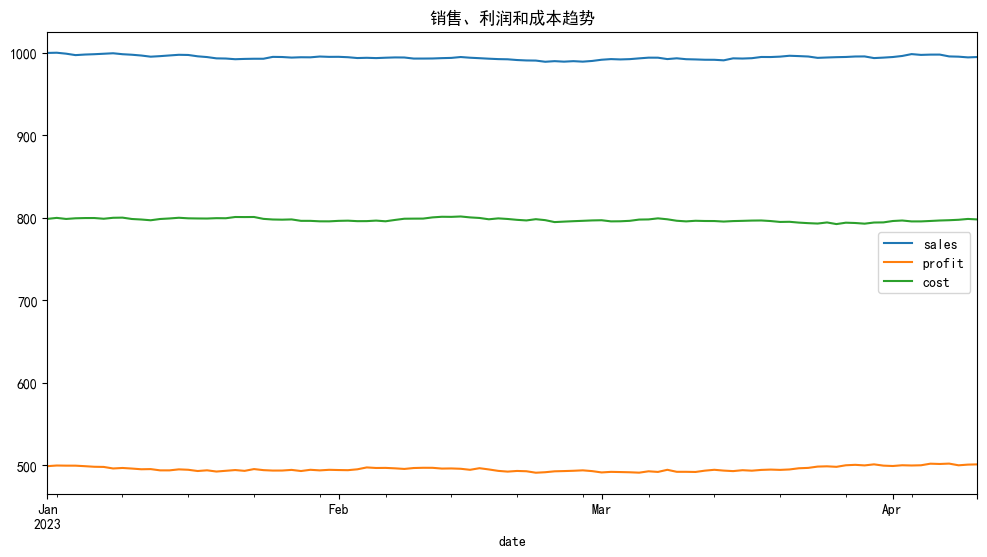

In [41]:
# 1. 学习基本绘图:df.plot()
print("1. 基本绘图:")
# 简单线图
ax1 = data[['sales', 'profit', 'cost']].plot(title='销售、利润和成本趋势', figsize=(12, 6))
plt.show()

## 2. 掌握不同图表类型: line, bar, hist, scatter, box, pie

**原理讲解：**
不同的数据类型和分析目标需要使用不同的图表类型。选择合适的图表类型是数据可视化的关键步骤，正确的选择能够有效地传达信息，而错误的选择可能导致误解或信息丢失。每种图表类型都有其特定的适用场景和优势。

**图表类型选择指南：**

**1. 线图 (Line Plot)**

- **适用场景**：展示数据随时间的变化趋势
- **优势**：清晰显示趋势、周期性和变化率
- **数据要求**：连续数据，通常是有序的时间序列

线图 (line):


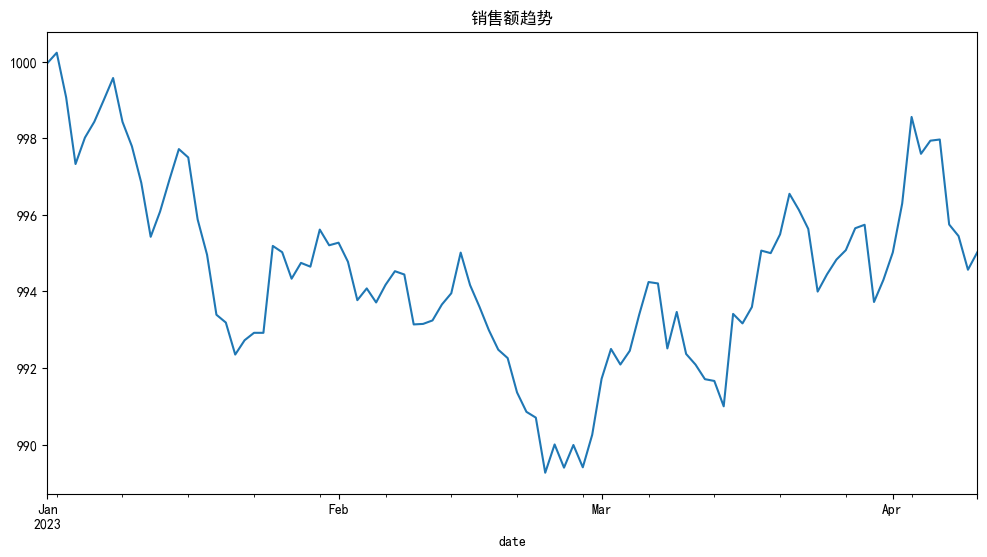

In [42]:
# 2. 掌握不同图表类型:line, bar, hist, scatter, box
# 线图
print("线图 (line):")
data['sales'].plot(kind='line', title='销售额趋势', figsize=(12, 6))
plt.show()


**2. 柱状图 (Bar Plot)**

- **适用场景**：比较不同类别的数值大小
- **优势**：直观比较分类数据，显示离散值
- **数据要求**：分类数据和对应的数值

柱状图 (bar):


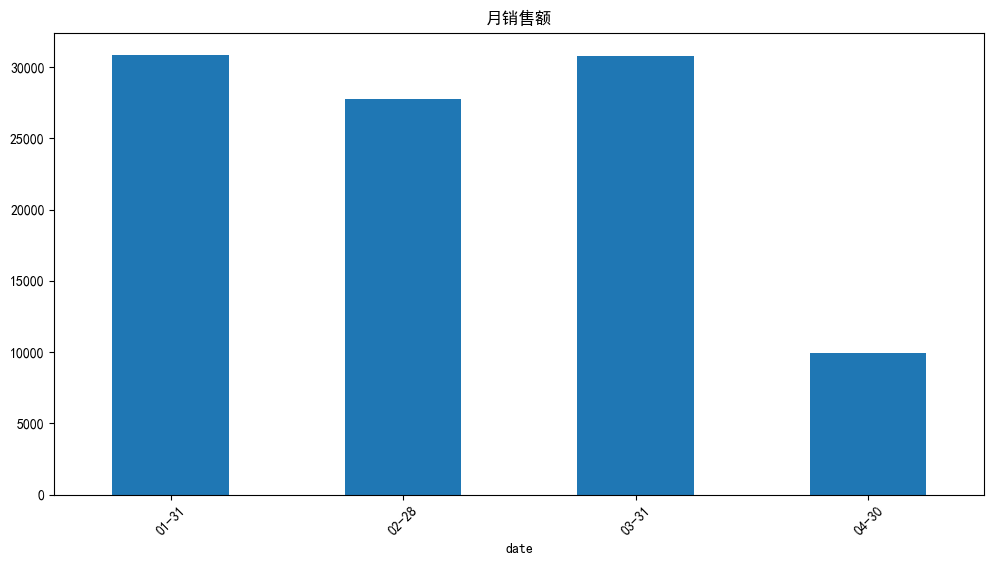

In [43]:
# 柱状图
print("柱状图 (bar):")
monthly_sales = data['sales'].resample('ME').sum()
monthly_sales.plot(kind='bar', title='月销售额', figsize=(12, 6))
plt.xticks(ticks=range(len(monthly_sales.index)), labels=monthly_sales.index.strftime('%m-%d'), rotation=45)
plt.show()


**3. 直方图 (Histogram)**

- **适用场景**：展示数值数据的分布情况
- **优势**：显示数据的分布形状、中心趋势和离散程度
- **数据要求**：连续的数值数据

直方图 (hist):


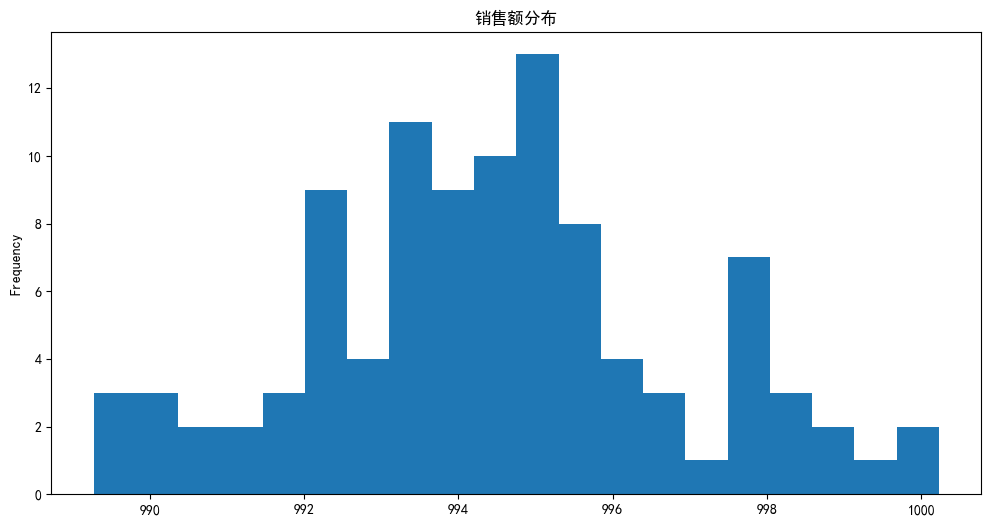

In [44]:
# 直方图
print("直方图 (hist):")
data['sales'].plot(kind='hist', bins=20, title='销售额分布', figsize=(12, 6))
plt.show()

**4. 散点图 (Scatter Plot)**

- **适用场景**：展示两个变量之间的关系
- **优势**：显示相关性、聚类和异常值
- **数据要求**：两个连续的数值变量

散点图 (scatter):


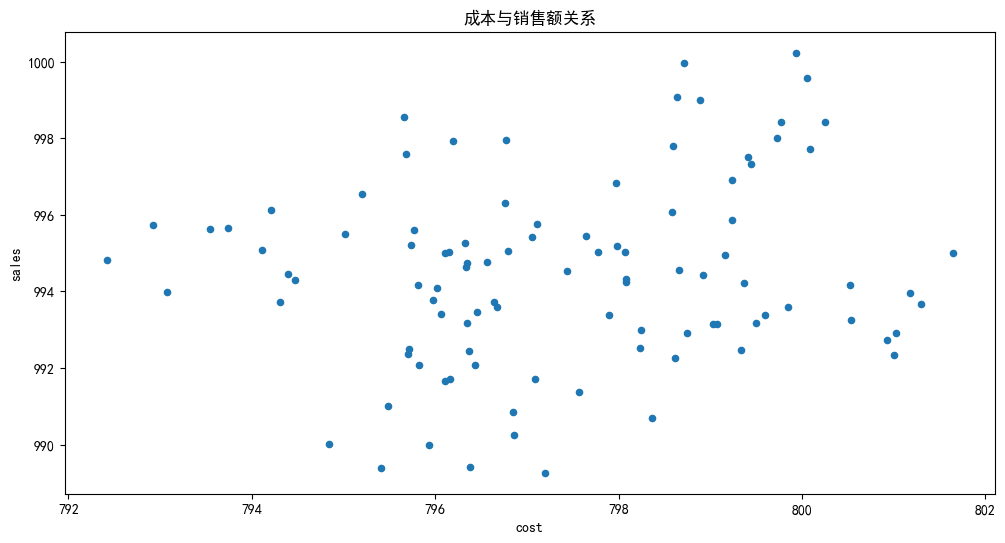

In [45]:
# 散点图
print("散点图 (scatter):")
data.plot(x='cost', y='sales', kind='scatter', title='成本与销售额关系', figsize=(12, 6))
plt.show()

**5. 箱线图 (Box Plot)**

- **适用场景**：展示数据的分布统计信息
- **优势**：显示中位数、四分位数、异常值等统计特征
- **数据要求**：数值数据，通常用于比较多个组

箱线图 (box):


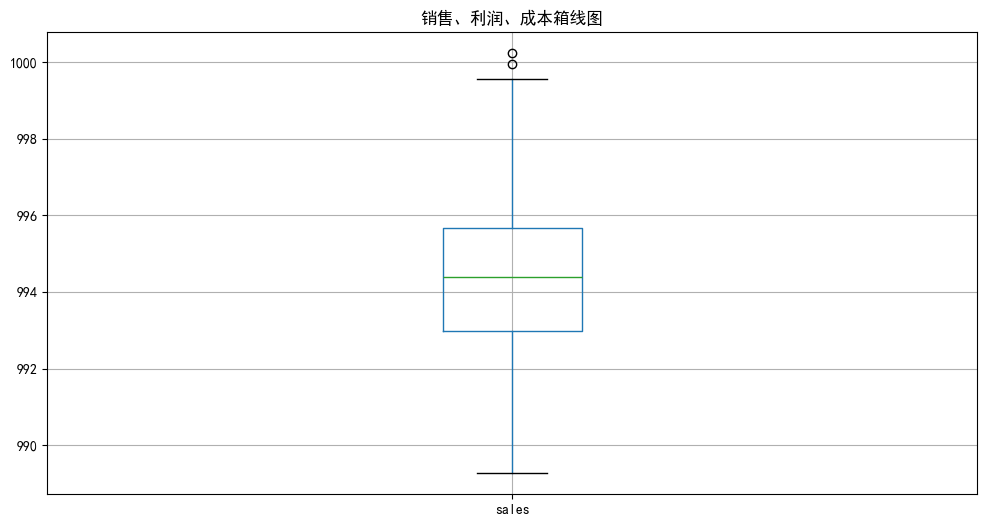

In [46]:
#  箱线图
print("箱线图 (box):")
data.boxplot(column=['sales'], figsize=(12, 6))
plt.title('销售、利润、成本箱线图')
plt.show()

**6. 饼图 (Pie Plot)**

- **适用场景**：展示各部分占整体的比例
- **优势**：直观显示组成比例
- **数据要求**：分类数据，各部分之和为100%

饼图:


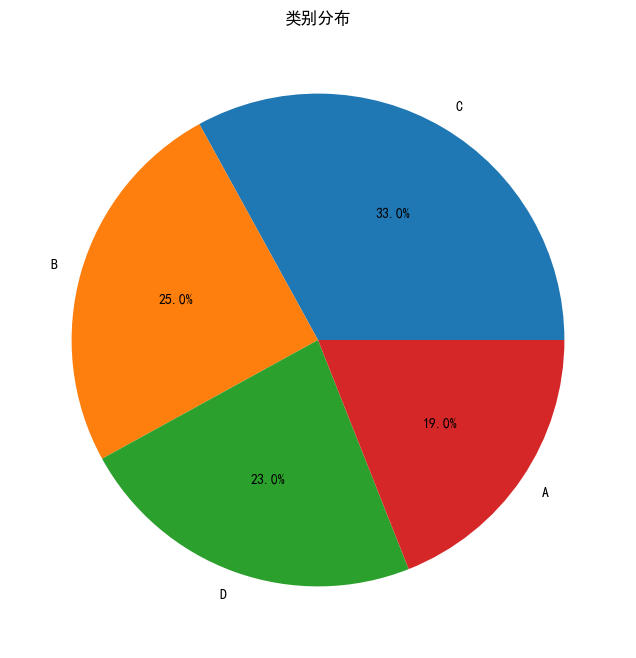

In [47]:
# 饼图
print("饼图:")
category_counts = data['category'].value_counts()
category_counts.plot(kind='pie', title='类别分布', figsize=(8, 8), autopct='%1.1f%%')
plt.ylabel('')
plt.show()

## 3. 自定义图表样式和参数

**原理讲解：**
图表的自定义样式和参数设置是数据可视化中的重要环节。通过合理的样式设置，可以使图表更加美观、专业，并且能够更好地传达信息。良好的可视化设计不仅要准确表达数据，还要考虑视觉美感和用户体验。

**图表自定义的重要性：**

1. **提升可读性**：合适的颜色、字体和布局使图表更易理解
2. **强调重点**：通过样式突出显示重要信息
3. **保持一致性**：统一的样式有助于建立专业的视觉形象
4. **适应场景**：不同的展示场景（报告、演示、网页）需要不同的样式
5. **增强吸引力**：美观的图表更容易吸引观众的注意力

**自定义参数详解：**

**颜色和样式参数：**

```python
# 颜色相关参数
color='blue'           # 单一颜色
color=['red', 'green'] # 多个颜色
colormap='viridis'     # 颜色映射
alpha=0.7              # 透明度

# 线条样式参数
linestyle='-'          # 实线
linestyle='--'         # 虚线
linewidth=2            # 线宽
marker='o'             # 标记点样式
markersize=6           # 标记点大小
```

**布局和尺寸参数：**

```python
figsize=(12, 6)        # 图表尺寸 (宽, 高)
layout=(2, 2)          # 子图布局 (行, 列)
tight_layout=True      # 自动调整布局
```

**标签和标题参数：**

```python
title='图表标题'        # 主标题
xlabel='X轴标签'       # x轴标签
ylabel='Y轴标签'       # y轴标签
legend=True            # 显示图例
grid=True              # 显示网格
```

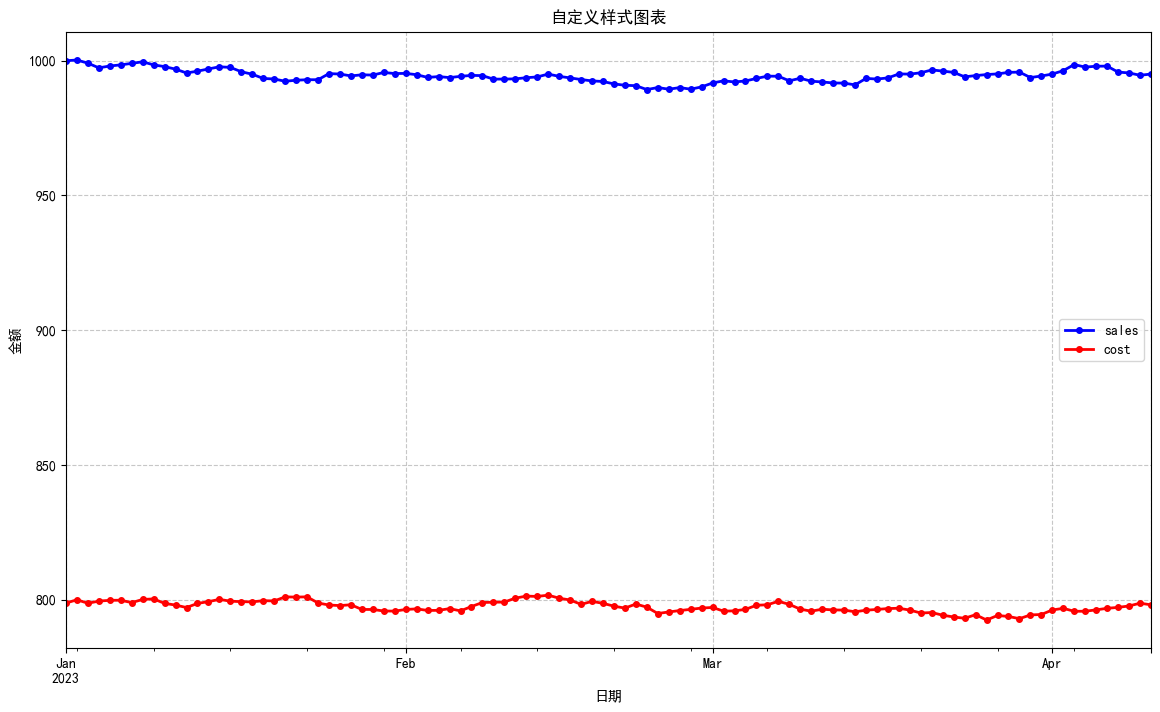

In [48]:
# 3. 自定义图表样式和参数
# 自定义线图
ax = data[['sales', 'cost']].plot(
    title='自定义样式图表',
    figsize=(14, 8),
    color=['blue', 'red'],
    linestyle='-',  # 线型
    marker='o',     # 标记点
    markersize=4,   # 标记点大小
    linewidth=2     # 线宽
)
ax.set_xlabel('日期')
ax.set_ylabel('金额')
ax.grid(True, linestyle='--', alpha=0.7)  # 添加网格
plt.show()

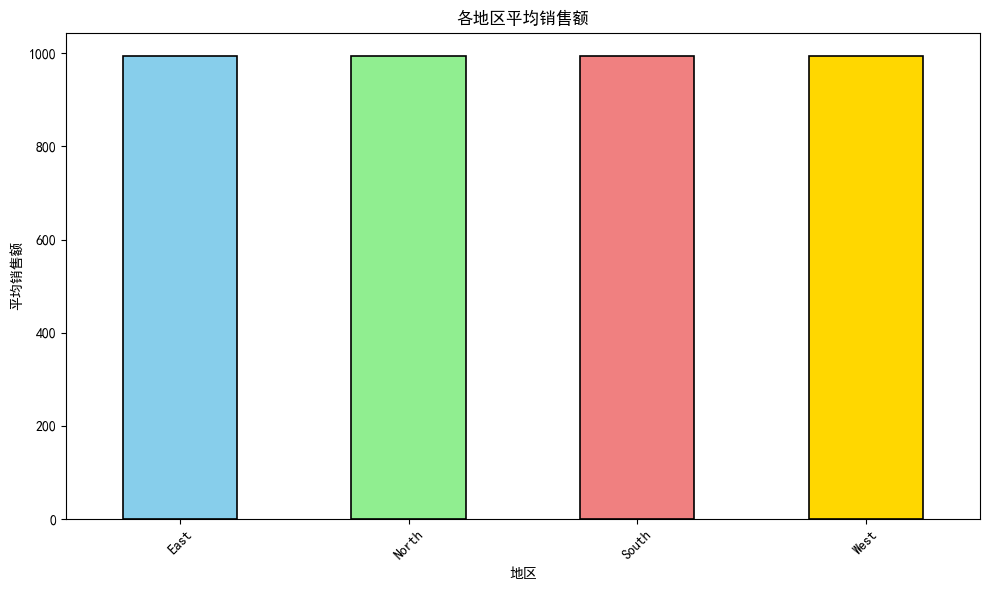

In [49]:
# 自定义柱状图
region_sales = data.groupby('region')['sales'].mean()
ax = region_sales.plot(
    kind='bar',
    title='各地区平均销售额',
    color=['skyblue', 'lightgreen', 'lightcoral', 'gold'],
    figsize=(10, 6),
    edgecolor='black',  # 边框颜色
    linewidth=1.2      # 边框宽度
)
ax.set_xlabel('地区')
ax.set_ylabel('平均销售额')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. 多子图绘制: subplots

**原理讲解：**
多子图绘制是指在一个图表窗口中创建多个独立的子图区域，每个子图可以展示不同的数据或视角。这种技术在需要比较多个相关指标、展示数据的不同维度或创建仪表板式布局时非常有用。通过合理的子图安排，可以在有限的展示空间内传达更丰富的信息。

**多子图的优势：**

1. **数据对比**：便于比较不同指标或不同组的数据
2. **空间利用**：在有限的展示空间内展示更多信息
3. **关联分析**：展示相关变量之间的关系和模式
4. **仪表板效果**：创建综合性的数据概览
5. **层次展示**：从不同角度展示数据的层次结构

**subplots 方法详解：**

**参数说明：**

```python
plt.subplots(nrows=1, ncols=1, figsize=None, sharex=False, sharey=False, 
             squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
```

**关键参数解释：**

- `nrows`: 子图的行数
- `ncols`: 子图的列数
- `figsize`: 整个图表窗口的大小
- `sharex`: 是否共享x轴刻度
- `sharey`: 是否共享y轴刻度
- `gridspec_kw`: 网格规格的高级设置

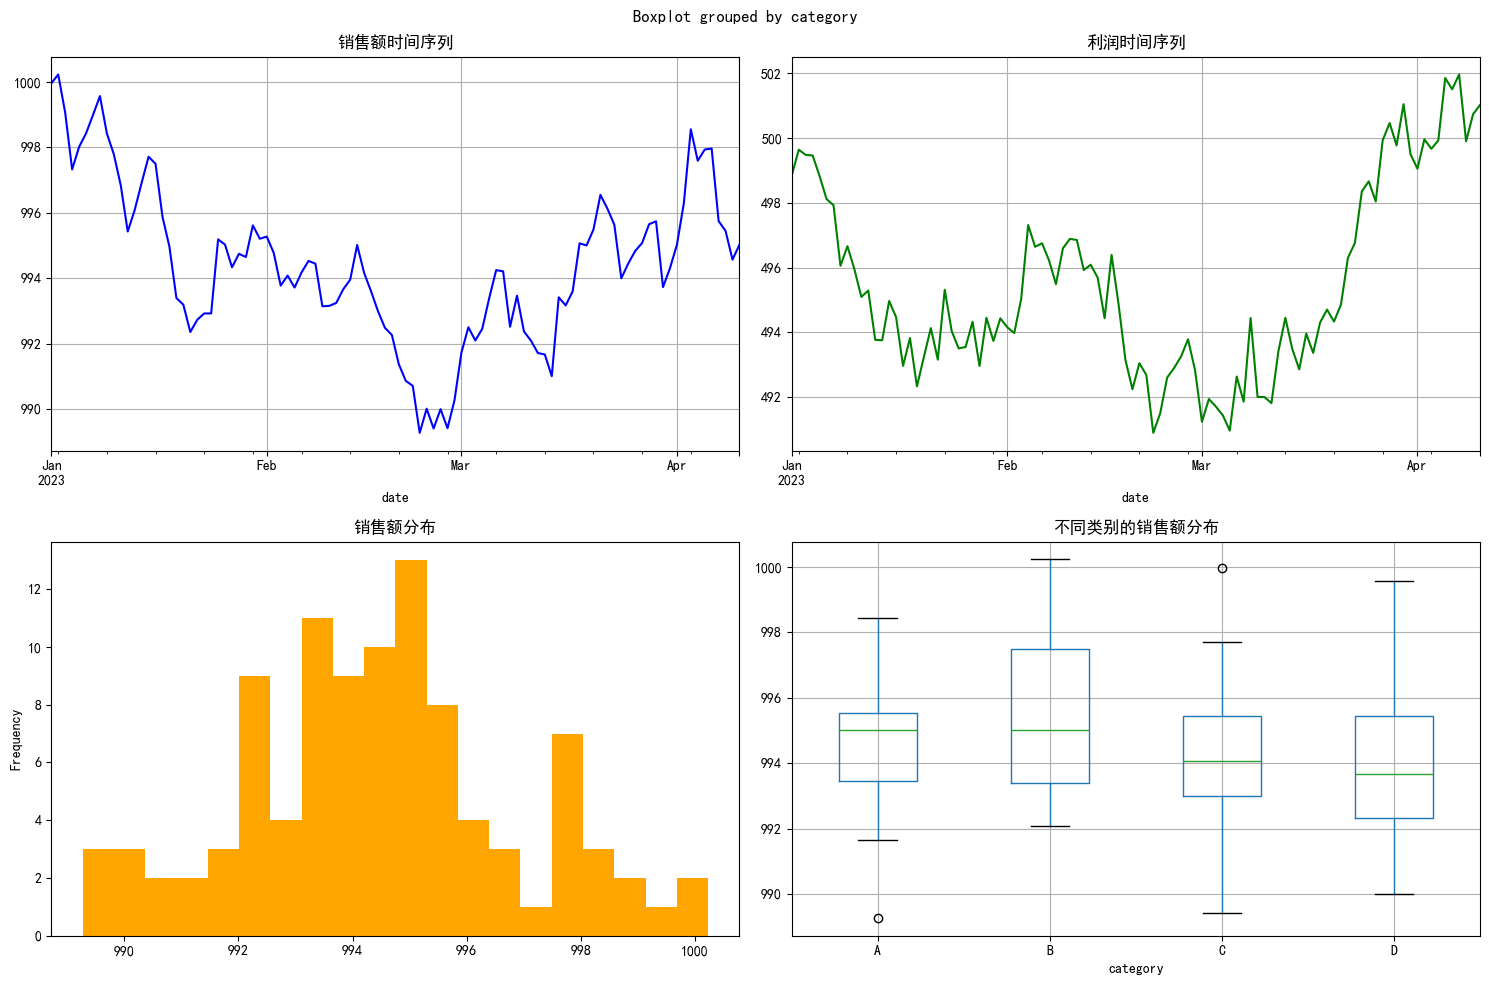

In [50]:
# 4. 多子图绘制:subplots
# 使用subplots参数创建多个子图
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 子图1:销售额时间序列
data['sales'].plot(ax=axes[0,0], title='销售额时间序列', color='blue')
axes[0,0].grid(True)

# 子图2:利润时间序列
data['profit'].plot(ax=axes[0,1], title='利润时间序列', color='green')
axes[0,1].grid(True)

# 子图3:销售额分布直方图
data['sales'].plot(kind='hist', ax=axes[1,0], title='销售额分布', bins=20, color='orange')

# 子图4:类别销售额箱线图
data.boxplot(column='sales', by='category', ax=axes[1,1])
axes[1,1].set_title('不同类别的销售额分布')

plt.tight_layout()
plt.show()

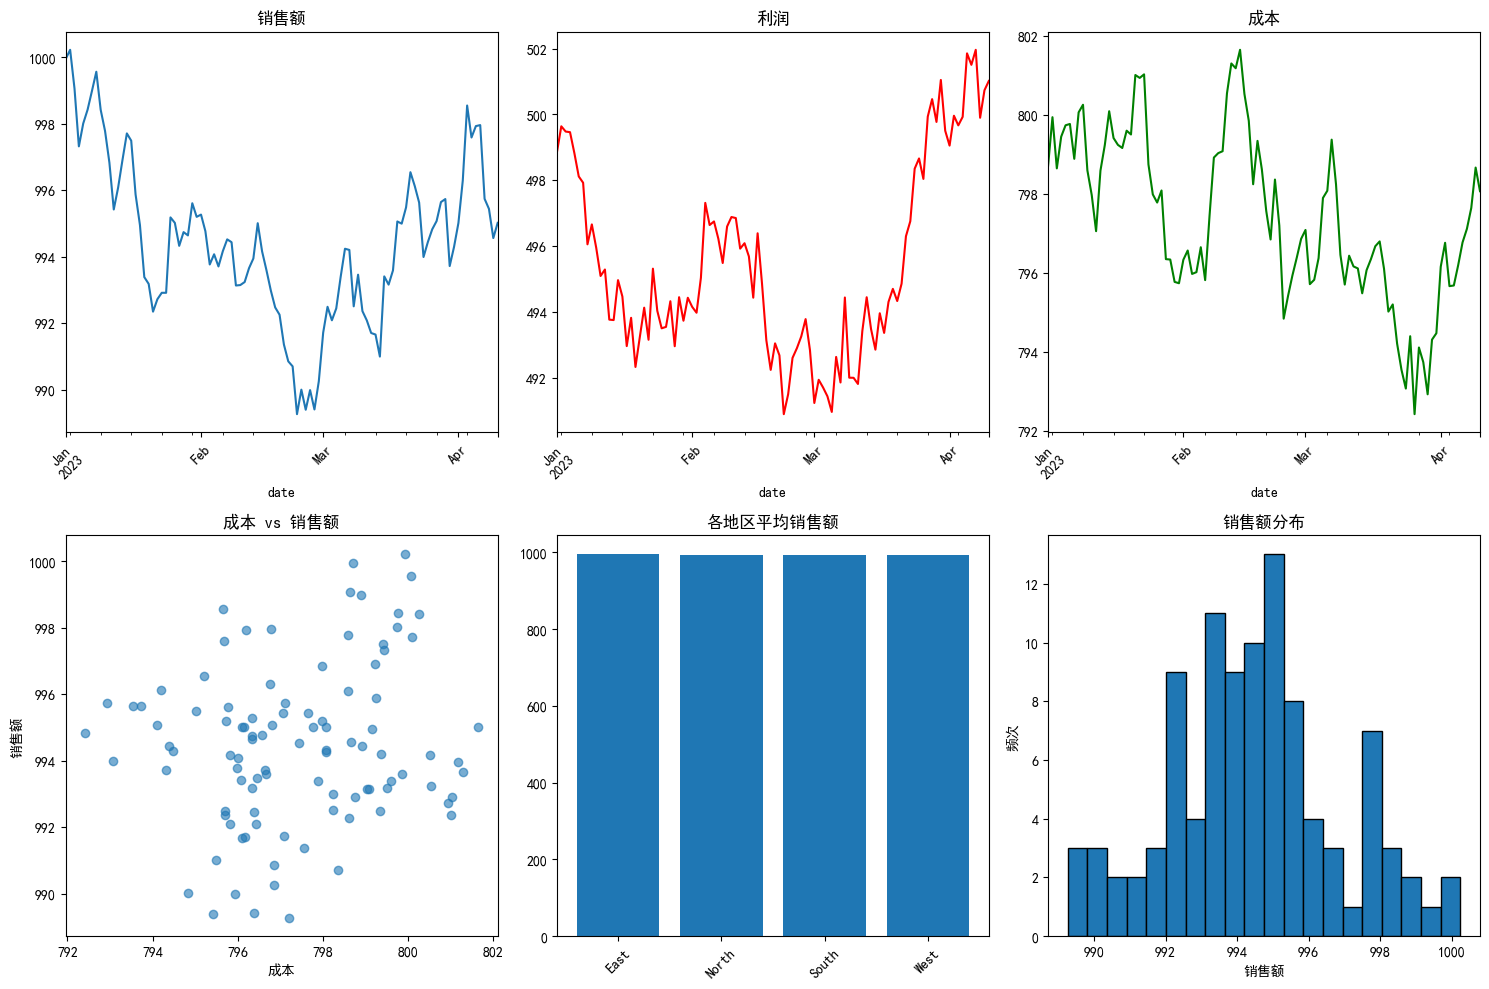

In [51]:
# 使用plt.subplot()手动创建子图
fig = plt.figure(figsize=(15, 10))

# 第一个子图
plt.subplot(2, 3, 1)
data['sales'].plot(kind='line', title='销售额')
plt.xticks(rotation=45)

# 第二个子图
plt.subplot(2, 3, 2)
data['profit'].plot(kind='line', title='利润', color='red')
plt.xticks(rotation=45)

# 第三个子图
plt.subplot(2, 3, 3)
data['cost'].plot(kind='line', title='成本', color='green')
plt.xticks(rotation=45)

# 第四个子图 - 散点图
plt.subplot(2, 3, 4)
plt.scatter(data['cost'], data['sales'], alpha=0.6)
plt.title('成本 vs 销售额')
plt.xlabel('成本')
plt.ylabel('销售额')

# 第五个子图 - 柱状图
plt.subplot(2, 3, 5)
region_avg = data.groupby('region')['sales'].mean()
plt.bar(region_avg.index, region_avg.values)
plt.title('各地区平均销售额')
plt.xticks(rotation=45)

# 第六个子图 - 直方图
plt.subplot(2, 3, 6)
plt.hist(data['sales'], bins=20, edgecolor='black')
plt.title('销售额分布')
plt.xlabel('销售额')
plt.ylabel('频次')

plt.tight_layout()
plt.show()


5. 结合 matplotlib 进行高级可视化:


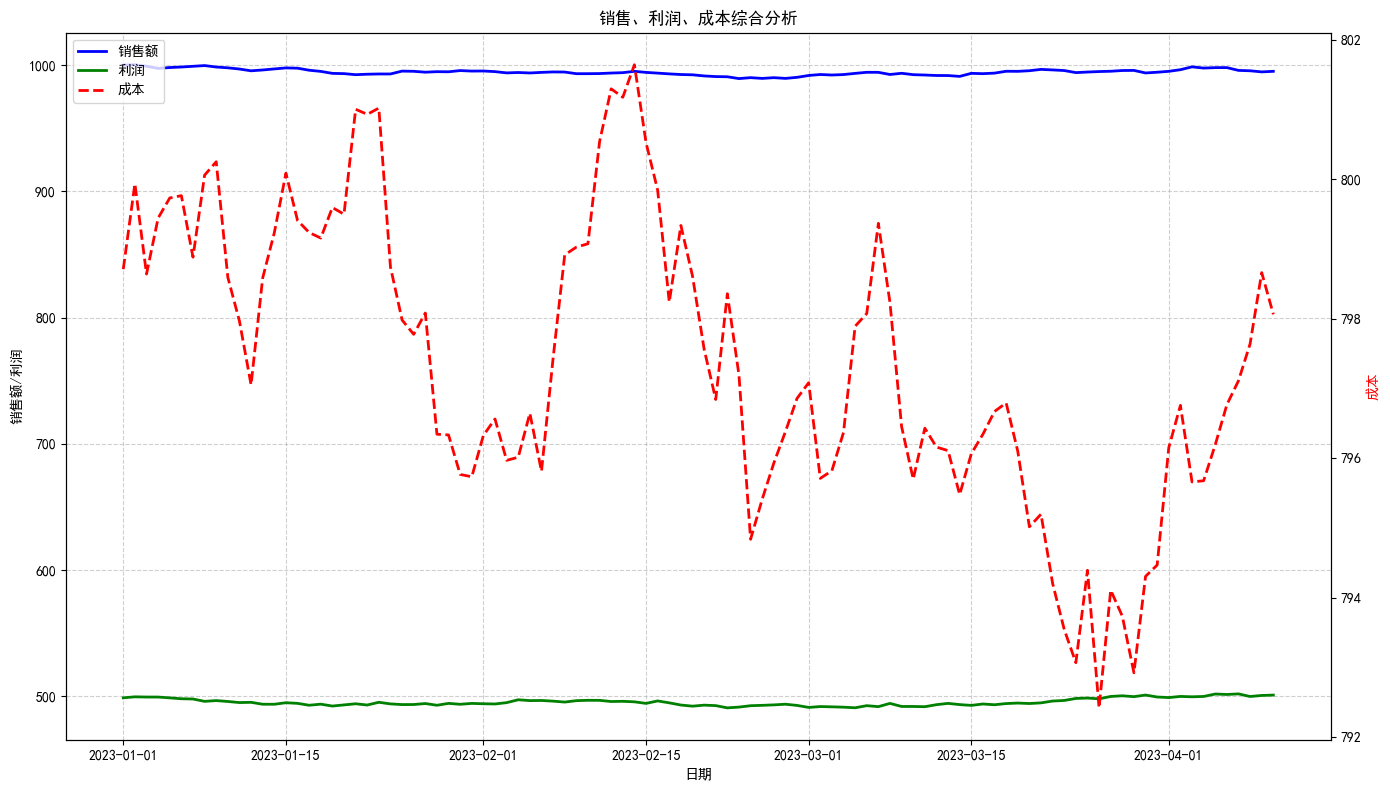

In [52]:
# 5. 结合 matplotlib 进行高级可视化
print("5. 结合 matplotlib 进行高级可视化:")

# 创建更复杂的图表
fig, ax = plt.subplots(figsize=(14, 8))

# 绘制主要数据
ax.plot(data.index, data['sales'], label='销售额', color='blue', linewidth=2)
ax.plot(data.index, data['profit'], label='利润', color='green', linewidth=2)

# 创建第二个y轴
ax2 = ax.twinx()
ax2.plot(data.index, data['cost'], label='成本', color='red', linewidth=2, linestyle='--')

# 设置标签和标题
ax.set_xlabel('日期')
ax.set_ylabel('销售额/利润', color='black')
ax2.set_ylabel('成本', color='red')
ax.set_title('销售、利润、成本综合分析')

# 添加图例
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# 添加网格
ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


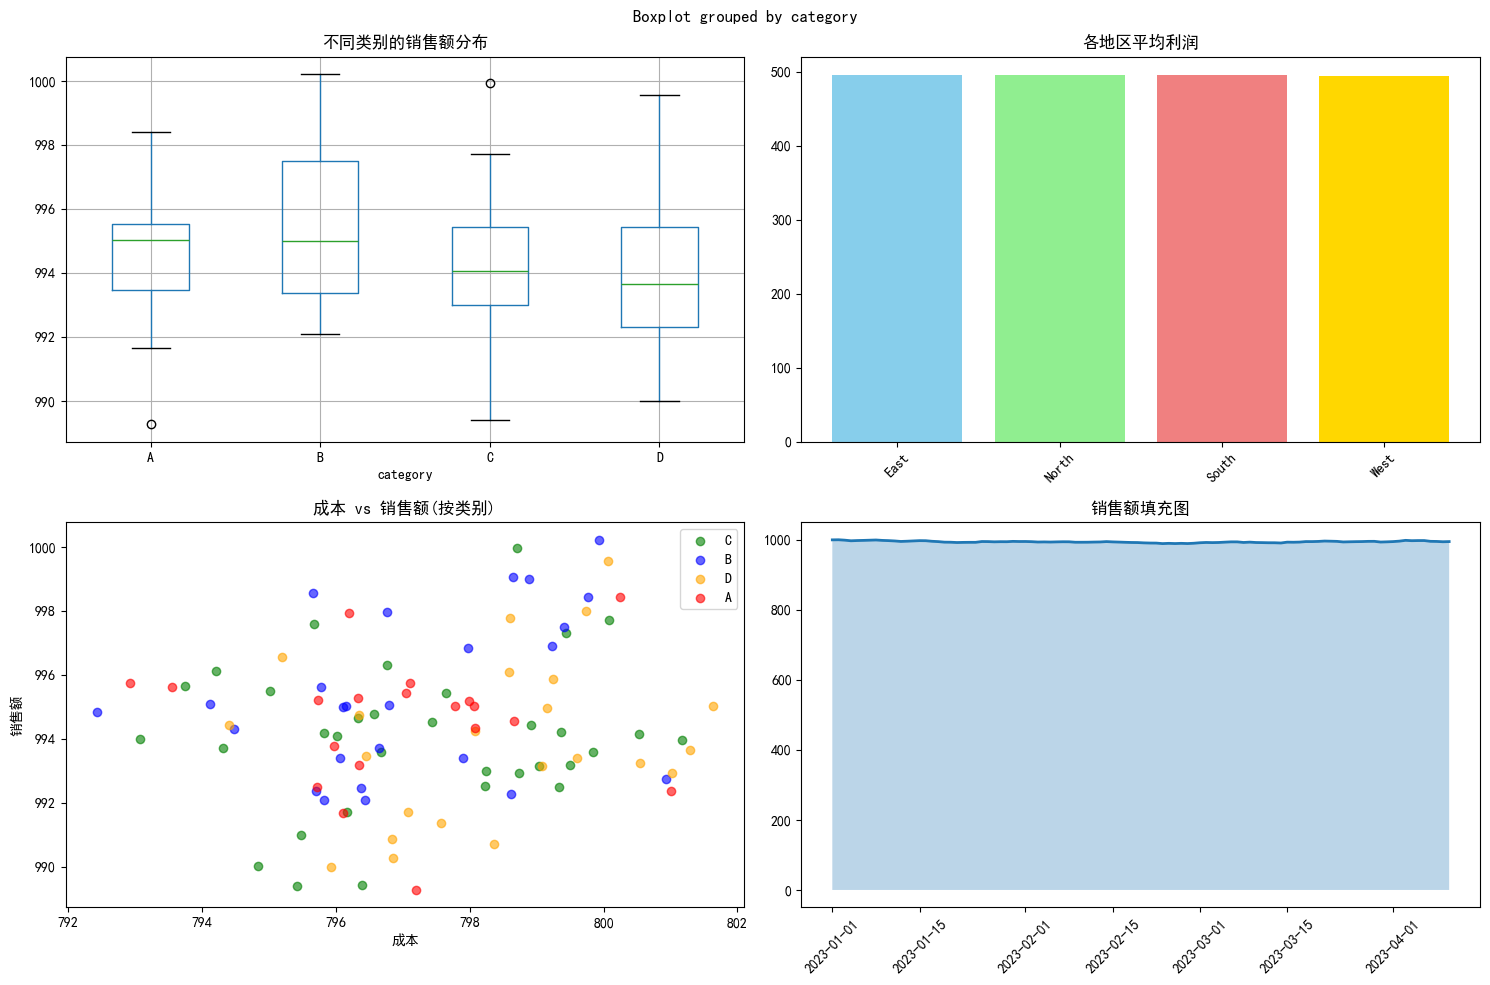

In [53]:
# 分组数据可视化
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 按类别分组的销售额箱线图
data.boxplot(column='sales', by='category', ax=axes[0,0])
axes[0,0].set_title('不同类别的销售额分布')

# 按地区分组的利润柱状图
region_profit = data.groupby('region')['profit'].mean()
axes[0,1].bar(region_profit.index, region_profit.values, color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
axes[0,1].set_title('各地区平均利润')
axes[0,1].tick_params(axis='x', rotation=45)

# 成本与销售额的散点图，按类别着色
colors = {'A': 'red', 'B': 'blue', 'C': 'green', 'D': 'orange'}
for category in data['category'].unique():
    mask = data['category'] == category
    axes[1,0].scatter(data.loc[mask, 'cost'], data.loc[mask, 'sales'], 
                     label=category, alpha=0.6, c=colors[category])
axes[1,0].set_xlabel('成本')
axes[1,0].set_ylabel('销售额')
axes[1,0].set_title('成本 vs 销售额(按类别)')
axes[1,0].legend()

# 时间序列的填充图
axes[1,1].fill_between(data.index, data['sales'], alpha=0.3, label='销售额')
axes[1,1].plot(data.index, data['sales'], linewidth=2)
axes[1,1].set_title('销售额填充图')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

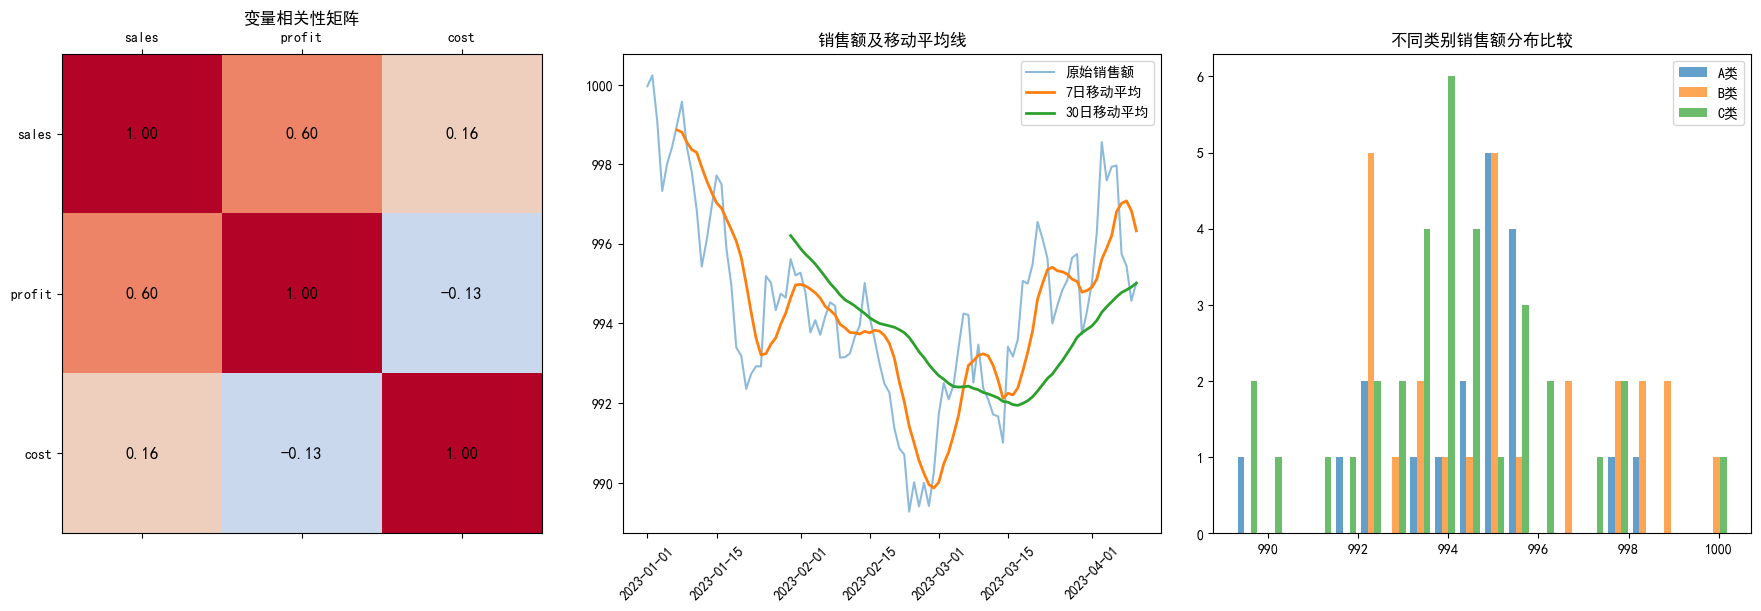

In [54]:
# 高级统计可视化
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 相关性热力图(使用seaborn风格的概念)
correlation_matrix = data[['sales', 'profit', 'cost']].corr()
im = axes[0].matshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
axes[0].set_xticks(range(len(correlation_matrix.columns)))
axes[0].set_yticks(range(len(correlation_matrix.columns)))
axes[0].set_xticklabels(correlation_matrix.columns)
axes[0].set_yticklabels(correlation_matrix.columns)
axes[0].set_title('变量相关性矩阵')
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        axes[0].text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', 
                    ha='center', va='center', fontsize=12)

# 移动平均线
data['sales_ma7'] = data['sales'].rolling(window=7).mean()
data['sales_ma30'] = data['sales'].rolling(window=30).mean()
axes[1].plot(data.index, data['sales'], label='原始销售额', alpha=0.5)
axes[1].plot(data.index, data['sales_ma7'], label='7日移动平均', linewidth=2)
axes[1].plot(data.index, data['sales_ma30'], label='30日移动平均', linewidth=2)
axes[1].set_title('销售额及移动平均线')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)

# 分布比较
axes[2].hist([data[data['category'] == 'A']['sales'], 
              data[data['category'] == 'B']['sales'], 
              data[data['category'] == 'C']['sales']], 
             bins=20, label=['A类', 'B类', 'C类'], alpha=0.7)
axes[2].set_title('不同类别销售额分布比较')
axes[2].legend()

plt.tight_layout()
plt.show()

## 任务9:高级操作与性能优化


## 学习目标

掌握 Pandas 的高级功能和性能优化技巧。

In [55]:
import pandas as pd
import numpy as np

# 创建示例数据
data = {
    'date': pd.date_range('2023-01-01', periods=100),
    'product': np.random.choice(['A', 'B', 'C', 'D'], 100),
    'region': np.random.choice(['North', 'South', 'East', 'West'], 100),
    'sales': np.random.randint(100, 1000, 100),
    'profit': np.random.randint(10, 100, 100),
    'quantity': np.random.randint(1, 50, 100),
    'customer_type': np.random.choice(['New', 'Returning'], 100)
}

df = pd.DataFrame(data)
print("原始数据:")
print(df.head())
print("\n数据信息:")
print(df.info())
print("\n" + "="*60)


原始数据:
        date product region  sales  profit  quantity customer_type
0 2023-01-01       C  North    321      85        40           New
1 2023-01-02       C  South    197      40        36     Returning
2 2023-01-03       A   West    568      17        48     Returning
3 2023-01-04       A  North    266      13        49           New
4 2023-01-05       D   West    830      43        48           New

数据信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           100 non-null    datetime64[ns]
 1   product        100 non-null    object        
 2   region         100 non-null    object        
 3   sales          100 non-null    int32         
 4   profit         100 non-null    int32         
 5   quantity       100 non-null    int32         
 6   customer_type  100 non-null    object        
dtypes: datetime64[ns](

## 1. 学习 pivot_table 和交叉表

**原理讲解：**
透视表（Pivot Table）和交叉表（Crosstab）是数据分析中非常强大的工具，它们能够将数据从"长格式"转换为"宽格式"，从而提供更直观的数据视图。透视表本质上是一个数据汇总工具，它可以根据一个或多个键对数据进行分组，然后对每个组应用聚合函数。交叉表则专门用于计算分组频率，特别适合分析分类变量之间的关系。

**透视表的核心概念：**

1. **索引（Index）**：作为行的分组依据
2. **列（Columns）**：作为列的分组依据
3. **值（Values）**：需要聚合的数值列
4. **聚合函数（Aggfunc）**：如何聚合数值（求和、平均、计数等）

**交叉表的核心概念：**

1. **行变量**：表格的行分类
2. **列变量**：表格的列分类
3. **值**：可选，用于计算统计量而非简单计数
4. **标准化**：可选，可以计算比例、百分比等

**pd.pivot_table() 方法详解：**

**参数说明：**

```python
pd.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', 
               fill_value=None, margins=False, dropna=True, margins_name='All')
```

**关键参数解释：**

- `data`: 要透视的DataFrame
- `values`: 需要聚合的列名
- `index`: 作为行索引的列名
- `columns`: 作为列索引的列名
- `aggfunc`: 聚合函数，可以是字符串、函数、列表或字典
- `fill_value`: 用于填充缺失值的值
- `margins`: 是否添加行/列的总计
- `dropna`: 是否删除全为NaN的列
- `margins_name`: 总计行/列的名称

**pd.crosstab() 方法详解：**

**参数说明：**

```python
pd.crosstab(index, columns, values=None, rownames=None, colnames=None, 
            aggfunc=None, margins=False, margins_name='All', dropna=False, normalize=False)
```

**关键参数解释：**

- `index`: 行标签或数组
- `columns`: 列标签或数组
- `values`: 可选，要聚合的值数组
- `aggfunc`: 聚合函数，需要指定values时使用
- `normalize`: 标准化方式，可以是'all'、'index'、'columns'或False
- `rownames/colnames`: 行/列的名称

In [56]:
# 1. 学习 pivot_table 和交叉表
print("1. pivot_table 和交叉表:")
print("基本透视表 - 按产品和地区汇总销售额:")
pivot_basic = pd.pivot_table(df, values='sales', index='product', columns='region', aggfunc='sum')
print(pivot_basic)

print("\n透视表 - 多个聚合函数:")
pivot_multi = pd.pivot_table(df, values='sales', index='product', columns='region', 
                            aggfunc=['sum', 'mean', 'count'])
print(pivot_multi)

print("\n透视表 - 多个值列:")
pivot_multi_values = pd.pivot_table(df, values=['sales', 'profit'], index='product', 
                                   columns='region', aggfunc='sum')
print(pivot_multi_values)

print("\n透视表 - 添加margins:")
pivot_margins = pd.pivot_table(df, values='sales', index='product', columns='region', 
                              aggfunc='sum', margins=True, margins_name='Total')
print(pivot_margins)

print("\n交叉表 - 产品和客户类型:")
crosstab = pd.crosstab(df['product'], df['customer_type'], margins=True)
print(crosstab)

print("\n交叉表 - 添加值和聚合函数:")
crosstab_values = pd.crosstab(df['product'], df['customer_type'], 
                             values=df['sales'], aggfunc='mean', margins=True)
print(crosstab_values)


1. pivot_table 和交叉表:
基本透视表 - 按产品和地区汇总销售额:
region   East  North  South  West
product                          
A        3085   2986   2595  5350
B        3378   4793   3240  1625
C        2340   4438   1852  4113
D        5311   2969   1246  3353

透视表 - 多个聚合函数:
          sum                          mean                                 \
region   East North South  West        East       North  South        West   
product                                                                      
A        3085  2986  2595  5350  440.714286  373.250000  432.5  668.750000   
B        3378  4793  3240  1625  675.600000  684.714286  810.0  406.250000   
C        2340  4438  1852  4113  780.000000  554.750000  370.4  411.300000   
D        5311  2969  1246  3353  442.583333  593.800000  623.0  558.833333   

        count                   
region   East North South West  
product                         
A           7     8     6    8  
B           5     7     4    4  
C           3     8     5  

## 2. 掌握多级索引操作

**原理讲解：**
多级索引（MultiIndex）是Pandas中处理高维数据的强大工具。它允许在一个轴上拥有多个索引级别，从而能够在保持数据结构简洁的同时表示复杂的数据关系。多级索引特别适合处理分层数据、时间序列数据以及需要进行复杂分组和聚合操作的数据集。

**多级索引的核心概念：**

1. **层级（Levels）**：索引的各个级别，每个级别可以有不同的标签
2. **标签（Labels）**：每个层级对应的标签值
3. **排序（Sorting）**：多级索引需要特定的排序方式以保证性能
4. **选择（Selection）**：可以通过不同方式选择特定层级的的数据

**多级索引的优势：**

1. **数据组织**：能够更自然地表示分层数据结构
2. **性能优化**：对于某些操作，多级索引比单层索引更高效
3. **数据聚合**：便于进行多层次的分组和聚合操作
4. **内存效率**：在某些情况下比使用多列更节省内存

**多级索引创建方法详解：**

**参数说明：**

```python
# 方法1：通过set_index创建
DataFrame.set_index(keys, drop=True, append=False, inplace=False)

# 方法2：通过MultiIndex.from_arrays创建
pd.MultiIndex.from_arrays(arrays, sortorder=None, names=None)

# 方法3：通过MultiIndex.from_tuples创建
pd.MultiIndex.from_tuples(tuples, sortorder=None, names=None)

# 方法4：通过MultiIndex.from_product创建
pd.MultiIndex.from_products(iterables, sortorder=None, names=None)
```

**多级索引选择方法详解：**

**参数说明：**

```python
# loc选择器
DataFrame.loc[index1, index2, ...]

# xs方法（跨级别选择）
DataFrame.xs(key, level=0, axis=0, drop_level=True)

# 其他方法
DataFrame.swaplevel(i=-2, j=-1, axis=0)
DataFrame.sort_index(level=None, ascending=True, inplace=False)
DataFrame.reset_index(level=None, drop=False, inplace=False)
```



In [57]:
# 2. 掌握多级索引操作
print("2. 多级索引操作:")
print("创建多级索引数据框:")
df_multi = df.set_index(['product', 'region'])
print(df_multi.head(10))

print("\n多级索引数据框信息:")
print(df_multi.index)

print("\n选择特定层级的数据:")
print("选择所有A产品的数据:")
print(df_multi.loc['A'])

print("\n选择A产品中North地区的数据:")
print(df_multi.sort_index().loc['A', 'North'])

print("\n使用xs方法选择:")
print("选择所有North地区数据:")
print(df_multi.xs('North', level='region'))

print("\n选择A产品中所有地区的销售额:")
print(df_multi.xs('A', level='product')['sales'])

print("\n重置索引:")
df_reset = df_multi.reset_index()
print(df_reset.head())

print("\n交换索引层级:")
df_swapped = df_multi.swaplevel()
print(df_swapped.head())

print("\n按层级排序:")
df_sorted = df_multi.sort_index(level=['region', 'product'])
print(df_sorted.head(10))
print("\n" + "="*60)


2. 多级索引操作:
创建多级索引数据框:
                     date  sales  profit  quantity customer_type
product region                                                  
C       North  2023-01-01    321      85        40           New
        South  2023-01-02    197      40        36     Returning
A       West   2023-01-03    568      17        48     Returning
        North  2023-01-04    266      13        49           New
D       West   2023-01-05    830      43        48           New
A       West   2023-01-06    299      43        43           New
B       North  2023-01-07    542      44         1           New
        East   2023-01-08    975      24        18     Returning
A       South  2023-01-09    141      52        24     Returning
B       West   2023-01-10    528      37        47     Returning

多级索引数据框信息:
MultiIndex([('C', 'North'),
            ('C', 'South'),
            ('A',  'West'),
            ('A', 'North'),
            ('D',  'West'),
            ('A',  'West'),
            ('B', 

## 3. 学习向量化操作提高性能

**原理讲解：**
向量化操作是Pandas性能优化的核心技术之一。与传统的循环操作不同，向量化操作利用底层优化的C代码和NumPy数组操作，能够同时对整个数组或Series进行计算，从而显著提高计算效率。向量化操作不仅代码更简洁，而且通常比等效的循环操作快几个数量级。

**向量化操作的核心原理：**

1. **SIMD指令**：现代CPU支持单指令多数据（SIMD）操作，可以同时处理多个数据元素
2. **内存连续性**：向量化操作利用内存的连续性，减少缓存未命中
3. **避免Python循环**：向量化操作在C层面执行，避免了Python解释器的开销
4. **并行计算**：某些向量化操作可以自动利用多核CPU的并行计算能力

**向量化操作的优势：**

1. **性能提升**：通常比循环操作快10-100倍
2. **代码简洁**：用更少的代码表达复杂的计算逻辑
3. **内存效率**：减少了中间变量的创建和内存分配
4. **可读性**：向量化代码通常更接近数学表达，更易理解

**常用向量化操作详解：**

**数学运算向量化：**

```python
# 基本数学运算
Series + Series          # 对应元素相加
Series - Series          # 对应元素相减
Series * Series          # 对应元素相乘
Series / Series          # 对应元素相除
Series ** Series         # 对应元素幂运算

# NumPy数学函数
np.log(Series)          # 自然对数
np.exp(Series)          # 指数函数
np.sqrt(Series)         # 平方根
np.sin(Series)          # 正弦函数
np.cos(Series)          # 余弦函数

# 统计函数
Series.mean()           # 平均值
Series.std()            # 标准差
Series.sum()            # 求和
Series.cumsum()         # 累积求和
```

**条件操作向量化：**

```python
# np.where条件选择
np.where(condition, x, y)  # 满足条件返回x，否则返回y

# np.select多条件选择
np.select(conditions, choices, default=0)

# 布尔索引
df[condition]           # 选择满足条件的行

# np.logical_系列函数
np.logical_and(cond1, cond2)
np.logical_or(cond1, cond2)
np.logical_not(cond)
```

**字符串操作向量化：**

```python
Series.str.lower()      # 转换为小写
Series.str.upper()      # 转换为大写
Series.str.contains()   # 检查包含
Series.str.replace()    # 替换字符串
Series.str.split()      # 分割字符串
```



In [58]:
# 3. 学习向量化操作提高性能
print("3. 向量化操作:")
print("创建数值数据进行演示:")
numeric_df = pd.DataFrame({
    'A': np.random.randn(1000000),
    'B': np.random.randn(1000000),
    'C': np.random.randn(1000000)
})

print("向量化操作 vs 循环操作性能对比:")
import time

# 向量化操作
start_time = time.time()
result_vectorized = numeric_df['A'] * numeric_df['B'] + numeric_df['C']
vectorized_time = time.time() - start_time
print(f"向量化操作耗时: {vectorized_time:.4f}秒")

# 使用循环操作(不推荐，仅作对比)
start_time = time.time()
result_loop = pd.Series(index=numeric_df.index, dtype=float)
for idx in numeric_df.index:
    result_loop[idx] = numeric_df.loc[idx, 'A'] * numeric_df.loc[idx, 'B'] + numeric_df.loc[idx, 'C']
loop_time = time.time() - start_time
print(f"循环操作耗时: {loop_time:.4f}秒")
print(f"向量化操作快 {loop_time/vectorized_time:.2f} 倍")

print("\n常用向量化操作:")
# 字符串向量化操作
df['sales_category'] = np.where(df['sales'] > df['sales'].median(), 'High', 'Low')
print("使用向量化条件操作创建销售类别:")
print(df['sales_category'].value_counts())

# 数学函数向量化
df['profit_margin'] = df['profit'] / df['sales']
df['log_sales'] = np.log(df['sales'])
print("\n向量化数学运算:")
print(df[['sales', 'profit', 'profit_margin', 'log_sales']].head())

print("\n" + "="*60)


3. 向量化操作:
创建数值数据进行演示:
向量化操作 vs 循环操作性能对比:
向量化操作耗时: 0.0054秒
循环操作耗时: 15.0415秒
向量化操作快 2804.57 倍

常用向量化操作:
使用向量化条件操作创建销售类别:
sales_category
Low     50
High    50
Name: count, dtype: int64

向量化数学运算:
   sales  profit  profit_margin  log_sales
0    321      85       0.264798   5.771441
1    197      40       0.203046   5.283204
2    568      17       0.029930   6.342121
3    266      13       0.048872   5.583496
4    830      43       0.051807   6.721426



## 4. 使用 apply 和 map 进行自定义操作

**原理讲解：**
虽然向量化操作是Pandas性能优化的首选方法，但在某些情况下，我们需要执行更复杂的自定义操作，这时就需要使用apply和map函数。apply函数可以应用于DataFrame的行或列，也可以应用于GroupBy对象，而map函数主要用于Series对象的元素级映射。理解这两个函数的工作原理和适用场景，对于处理复杂的数据转换任务至关重要。

**apply()函数的核心原理：**

1. **轴参数（axis）**：axis=0表示按列操作（默认），axis=1表示按行操作
2. **函数应用**：apply会将指定的函数应用于每个行/列或分组
3. **返回值**：根据应用的函数，返回DataFrame、Series或标量值
4. **性能考虑**：apply本质上是循环操作，性能不如向量化操作

**map()函数的核心原理：**

1. **元素级映射**：map专门用于Series的元素级转换
2. **映射对象**：可以是字典、Series或函数
3. **缺失值处理**：对于无法映射的值，返回NaN
4. **性能**：比apply更高效，但功能相对有限

**apply()方法详解：**

**参数说明：**

```python
DataFrame.apply(func, axis=0, raw=False, result_type=None, args=(), **kwds)
```

**关键参数解释：**

- `func`: 要应用的函数，可以是函数对象、lambda函数或函数名字符串
- `axis`: 应用函数的轴，0表示列，1表示行
- `raw`: 如果为True，将ndarray作为参数传递给函数
- `result_type`: 控制结果类型，可选'expand'、'reduce'、'broadcast'
- `args`: 传递给函数的位置参数
- `**kwds`: 传递给函数的关键字参数

**map()方法详解：**

**参数说明：**

```python
Series.map(arg, na_action=None)
```

**关键参数解释：**

- `arg`: 映射对象，可以是字典、Series或函数
- `na_action`: 处理NaN值的方式，'ignore'表示忽略NaN值

In [59]:
# 4. 使用 apply 和 map 进行自定义操作
print("4. apply 和 map 操作:")
print("对单列使用apply:")
def categorize_sales(sales):
    if sales < 300:
        return 'Low'
    elif sales < 700:
        return 'Medium'
    else:
        return 'High'

df['sales_level'] = df['sales'].apply(categorize_sales)
print(df[['sales', 'sales_level']].head())

print("\n对多列使用apply (axis=1):")
def calculate_performance(row):
    return row['profit'] / row['sales'] * 100

df['performance_pct'] = df.apply(calculate_performance, axis=1)
print(df[['sales', 'profit', 'performance_pct']].head())

print("\n使用map进行值映射:")
region_mapping = {'North': '北方', 'South': '南方', 'East': '东方', 'West': '西方'}
df['region_cn'] = df['region'].map(region_mapping)
print(df[['region', 'region_cn']].head())

print("\n使用map对整个数据框操作:")
numeric_subset = df[['sales', 'profit', 'quantity']].head()
print("原始数值子集:")
print(numeric_subset)
print("\n应用函数到所有数值:")
numeric_applied = numeric_subset.map(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)
print(numeric_applied)

print("\n分组后使用apply:")
grouped_result = df.groupby('product').apply(lambda x: x['sales'].sum() / x['quantity'].sum(), include_groups=False)
print("每种产品的平均单价:")
print(grouped_result)
print("\n" + "="*60)


4. apply 和 map 操作:
对单列使用apply:
   sales sales_level
0    321      Medium
1    197         Low
2    568      Medium
3    266         Low
4    830        High

对多列使用apply (axis=1):
   sales  profit  performance_pct
0    321      85        26.479751
1    197      40        20.304569
2    568      17         2.992958
3    266      13         4.887218
4    830      43         5.180723

使用map进行值映射:
  region region_cn
0  North        北方
1  South        南方
2   West        西方
3  North        北方
4   West        西方

使用map对整个数据框操作:
原始数值子集:
   sales  profit  quantity
0    321      85        40
1    197      40        36
2    568      17        48
3    266      13        49
4    830      43        48

应用函数到所有数值:
    sales profit quantity
0  321.00  85.00    40.00
1  197.00  40.00    36.00
2  568.00  17.00    48.00
3  266.00  13.00    49.00
4  830.00  43.00    48.00

分组后使用apply:
每种产品的平均单价:
product
A    17.009709
B    29.163311
C    18.178317
D    19.366917
dtype: float64



## 5. 内存优化技巧和数据类型选择

**原理讲解：**
内存优化是处理大型数据集时的关键技能。Pandas提供了多种内存优化技术，包括选择合适的数据类型、使用分类数据类型、优化字符串存储等。合理的内存优化不仅可以减少内存使用，还能提高计算性能，特别是在处理超出内存容量的大数据集时尤为重要。

**内存优化的核心原理：**

1. **数据类型选择**：不同数据类型占用不同的内存空间，选择最小够用的类型
2. **分类数据**：对于低基数的字符串列，使用category类型可以大幅节省内存
3. **字符串优化**：避免存储重复的字符串，使用更高效的编码方式
4. **稀疏数据**：对于包含大量缺失值或重复值的数据，使用稀疏数据结构
5. **分块处理**：对于超大文件，使用分块读取和处理技术

**数据类型内存占用对比：**

- `int64`: 8字节
- `int32`: 4字节
- `int16`: 2字节
- `int8`: 1字节
- `float64`: 8字节
- `float32`: 4字节
- `object`: 变长（通常较大）
- `category`: 取决于唯一值数量

**内存优化方法详解：**

**数据类型优化：**

```python
# 数值类型优化
pd.to_numeric(series, downcast='integer')  # 向下转换整数类型
pd.to_numeric(series, downcast='float')    # 向下转换浮点类型

# 分类类型转换
series.astype('category')

# 字符串类型优化
series.astype('string')  # Pandas 1.0+ 的StringDtype
```

**内存分析方法：**

```python
# 查看内存使用情况
df.memory_usage(deep=True)           # 每列的内存使用
df.memory_usage(deep=True).sum()     # 总内存使用
df.info(memory_usage='deep')         # 详细内存信息
```



In [60]:
# 5. 内存优化技巧和数据类型选择
print("5. 内存优化技巧和数据类型选择:")
print("原始数据框内存使用情况:")
print(df.info(memory_usage='deep'))

print("\n数据类型优化示例:")
# 显示当前数据类型
print("当前数据类型:")
print(df.dtypes)

# 优化字符串列为category类型(当唯一值较少时)
print("\n将低基数字符串列转换为category类型:")
df_optimized = df.copy()
df_optimized['product'] = df_optimized['product'].astype('category')
df_optimized['region'] = df_optimized['region'].astype('category')
df_optimized['customer_type'] = df_optimized['customer_type'].astype('category')
df_optimized['sales_level'] = df_optimized['sales_level'].astype('category')
df_optimized['region_cn'] = df_optimized['region_cn'].astype('category')

print("优化后的数据类型:")
print(df_optimized.dtypes)

print("\n内存使用对比:")
original_memory = df.memory_usage(deep=True).sum()
optimized_memory = df_optimized.memory_usage(deep=True).sum()
print(f"原始内存使用: {original_memory} bytes")
print(f"优化后内存使用: {optimized_memory} bytes")
print(f"内存节省: {((original_memory - optimized_memory) / original_memory) * 100:.2f}%")

print("\n数值类型优化:")
# 对于整数，选择合适的类型
print("整数列的范围分析:")
for col in ['sales', 'profit', 'quantity']:
    print(f"{col}: min={df[col].min()}, max={df[col].max()}, dtype={df[col].dtype}")

# 优化整数类型
df_optimized['sales'] = pd.to_numeric(df_optimized['sales'], downcast='integer')
df_optimized['profit'] = pd.to_numeric(df_optimized['profit'], downcast='integer')
df_optimized['quantity'] = pd.to_numeric(df_optimized['quantity'], downcast='integer')

print("\n优化后的数据类型:")
print(df_optimized.dtypes)

# 其他内存优化技巧
print("\n其他内存优化技巧:")
print("使用query方法替代布尔索引(在大数据集上更高效):")
high_sales = df.query('sales > 500')
print(f"高销售额记录数: {len(high_sales)}")

print("\n使用eval进行复杂计算(在大数据集上更高效):")
df['calculation'] = df.eval('sales * profit / quantity')
print(df[['sales', 'profit', 'quantity', 'calculation']].head())

print("\n选择性读取列(处理大文件时):")
# 这在读取大文件时特别有用
# pd.read_csv('large_file.csv', usecols=['col1', 'col2', 'col3'])

print("\n使用chunksize处理大文件:")
# 这在处理超出内存的大文件时很有用
# for chunk in pd.read_csv('large_file.csv', chunksize=10000):
#     process(chunk)

print("\n" + "="*60)

# 综合示例:性能优化的实际应用
print("综合示例:性能优化的实际应用")
print("创建一个大型数据集进行优化演示:")
large_data = {
    'category': np.random.choice(['Type_A', 'Type_B', 'Type_C', 'Type_D', 'Type_E'], 100000),
    'value1': np.random.randn(100000),
    'value2': np.random.randint(1, 100, 100000),
    'group': np.random.choice(['Group1', 'Group2', 'Group3'], 100000)
}
large_df = pd.DataFrame(large_data)

print("优化前:")
print(f"内存使用: {large_df.memory_usage(deep=True).sum()} bytes")
print(f"数据类型:\n{large_df.dtypes}")

# 优化
large_df['category'] = large_df['category'].astype('category')
large_df['group'] = large_df['group'].astype('category')
large_df['value2'] = pd.to_numeric(large_df['value2'], downcast='integer')

print("\n优化后:")
print(f"内存使用: {large_df.memory_usage(deep=True).sum()} bytes")
print(f"数据类型:\n{large_df.dtypes}")

print("\n性能优化总结:")
print("- 使用category类型存储低基数字符串")
print("- 选择合适的数据类型(int8, int16, float32等)")
print("- 使用向量化操作而非循环")
print("- 使用query和eval进行复杂计算")
print("- 使用chunksize处理大文件")
print("- 合理使用索引和分块处理")


5. 内存优化技巧和数据类型选择:
原始数据框内存使用情况:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             100 non-null    datetime64[ns]
 1   product          100 non-null    object        
 2   region           100 non-null    object        
 3   sales            100 non-null    int32         
 4   profit           100 non-null    int32         
 5   quantity         100 non-null    int32         
 6   customer_type    100 non-null    object        
 7   sales_category   100 non-null    object        
 8   profit_margin    100 non-null    float64       
 9   log_sales        100 non-null    float64       
 10  sales_level      100 non-null    object        
 11  performance_pct  100 non-null    float64       
 12  region_cn        100 non-null    object        
dtypes: datetime64[ns](1), float64(3), int32(3), object(6)
memory usag